# **Breast Cancer Classification Using Machine Learning**

Link to dataset : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

1. **Dataset Information** :
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

2. **Input Variables** :     
  Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)

	b) texture (standard deviation of gray-scale values)

	c) perimeter

	d) area

	e) smoothness (local variation in radius lengths)

	f) compactness (perimeter^2 / area - 1.0)

	g) concavity (severity of concave portions of the contour)

	h) concave points (number of concave portions of the contour)

	i) symmetry

	j) fractal dimension ("coastline approximation" - 1)



3. **Ouput Variable** :    
Diagnosis (M = malignant, B = benign)

4. **Models Used** :    
    1. Random Forest Classification
    2. Logistic Regression
    3. Xgboost Classification


Github Repo : https://github.com/rajat-kumar-thakur/Breast-Cancer-Classification-Using-Machine-Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy.cluster.hierarchy import linkage, dendrogram
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

## **1. Dataset Collection and Visualization**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/data.csv')

Lets look at all the features of our dataset.

In [4]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


We will drop these three columns for the following reason:
1. There is an id that cannot be used for classificaiton.
2. Diagnosis is our class label.
3. Unnamed: 32 feature includes NaN so we do not need it.

In [6]:
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Let us take a look at our output and input variables.

Number of Benign:  357
Number of Malignant :  212


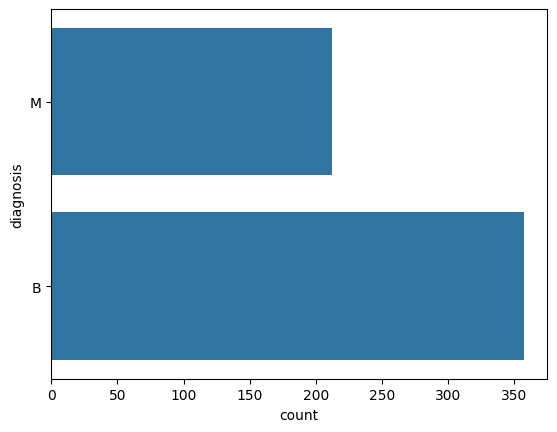

In [7]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [8]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

### Visualizations

#### 1. Box Plot

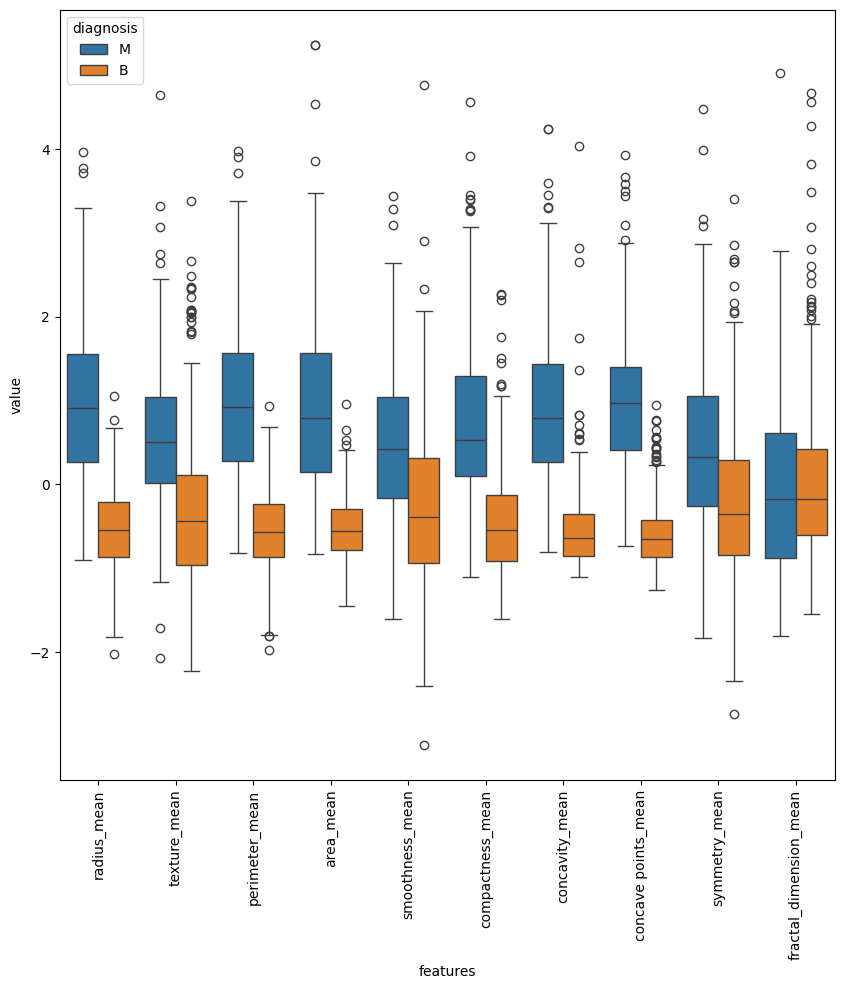

In [9]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

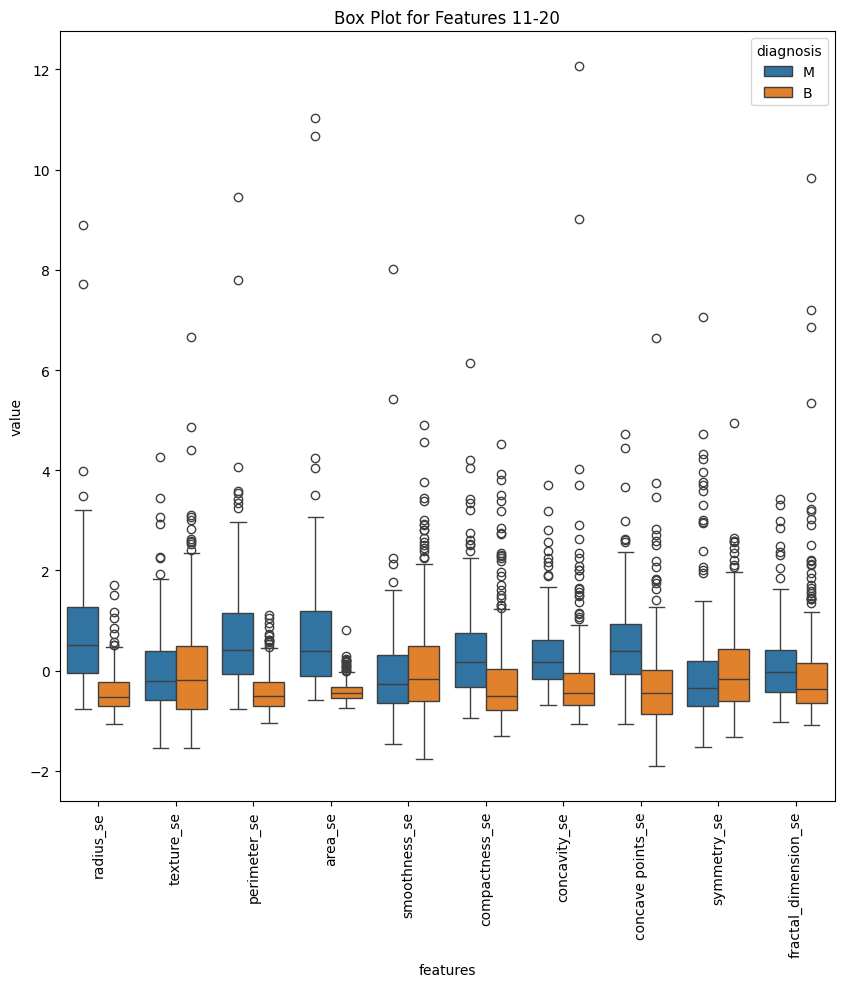

In [10]:
# next ten features (features 11-20)
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 11-20")
plt.show()

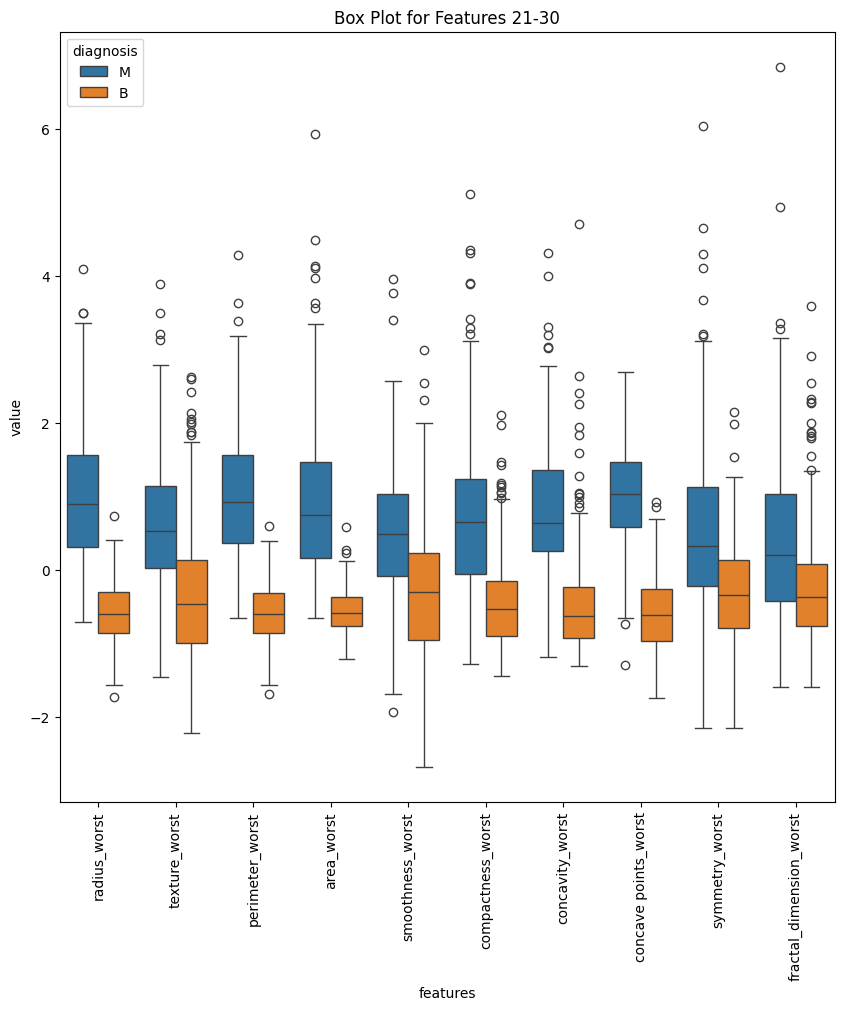

In [11]:
# next ten features (features 21-30)
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y, data_n_2.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 21-30")
plt.show()

In texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

#### 2. Joint Plot



In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearson value is correlation value and 1 is the highest. Therefore, 0.855 is looks enough to say that they are correlated.


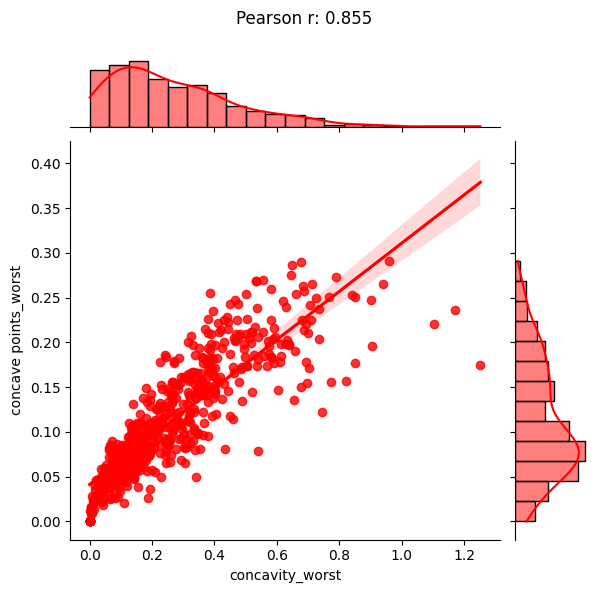

In [12]:
g = sns.jointplot(x='concavity_worst', y='concave points_worst', data=x, kind="reg", color="red")

r = x['concavity_worst'].corr(x['concave points_worst'])
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Pearson r: {r:.3f}', fontsize=12)

plt.show()

#### 3. Violin plots

The violin plot is particularly useful for this dataset because it combines elements of a box plot with a kernel density plot, providing a more comprehensive view of your data's distribution than simpler visualizations.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

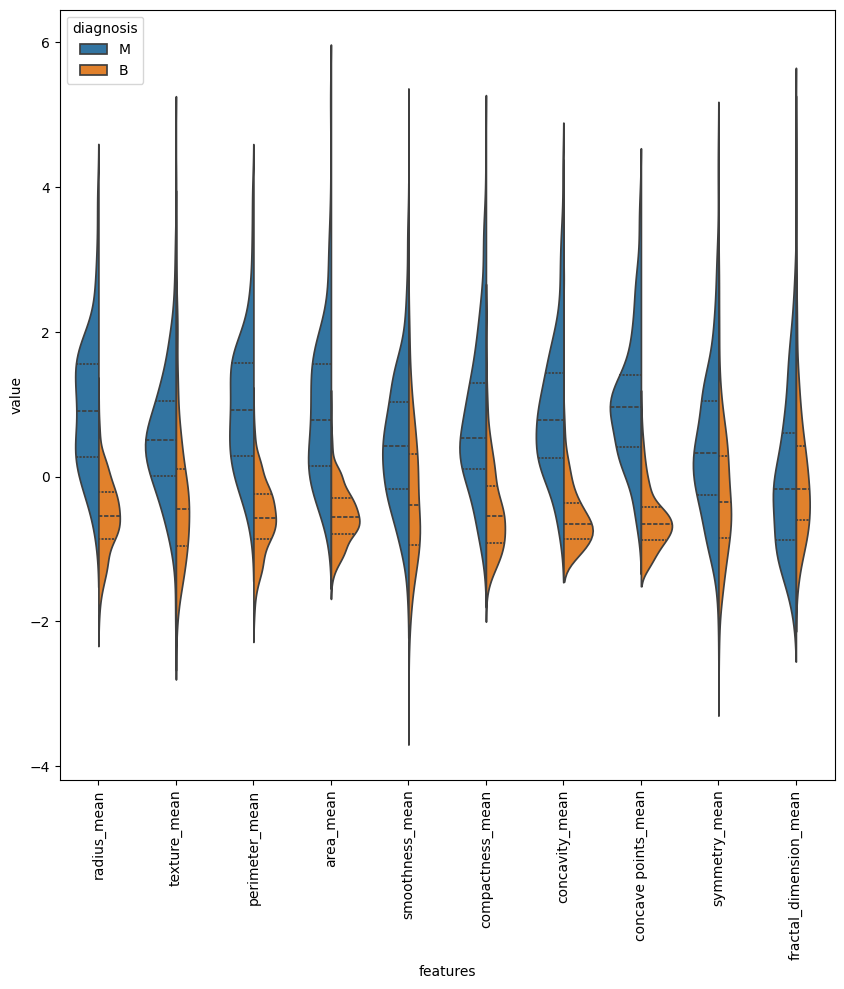

In [13]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

 #### 4. Swarm Plot

 In these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

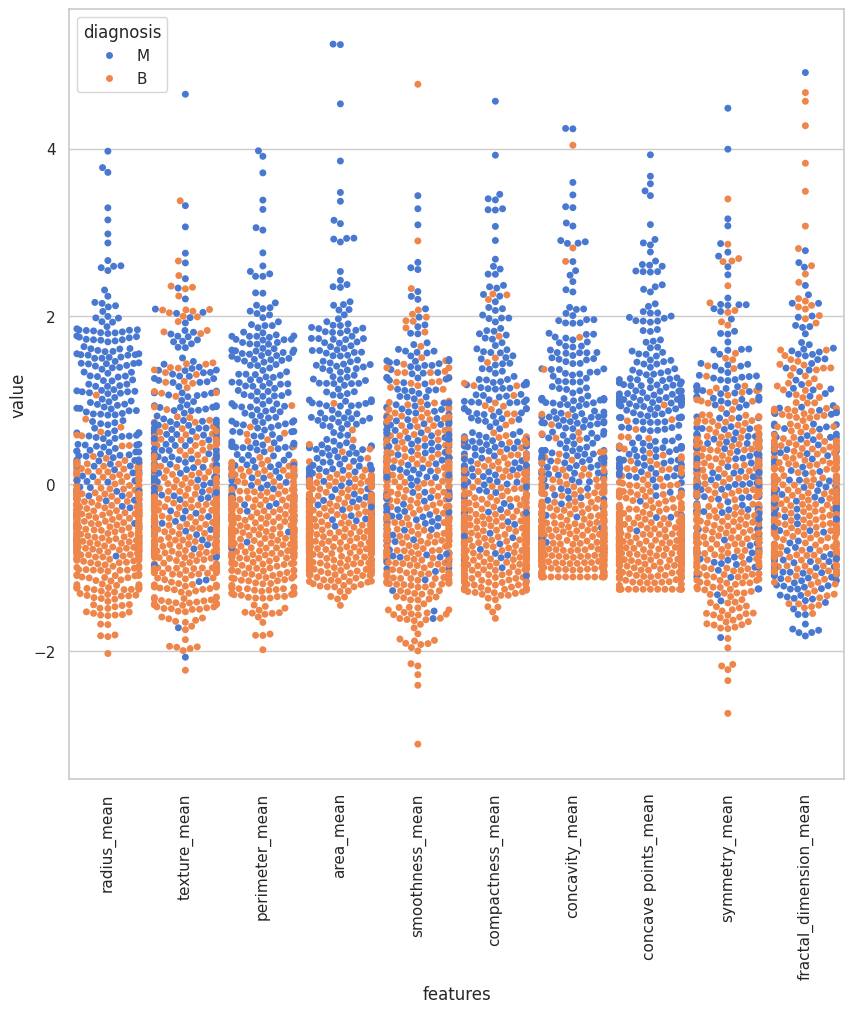

In [14]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

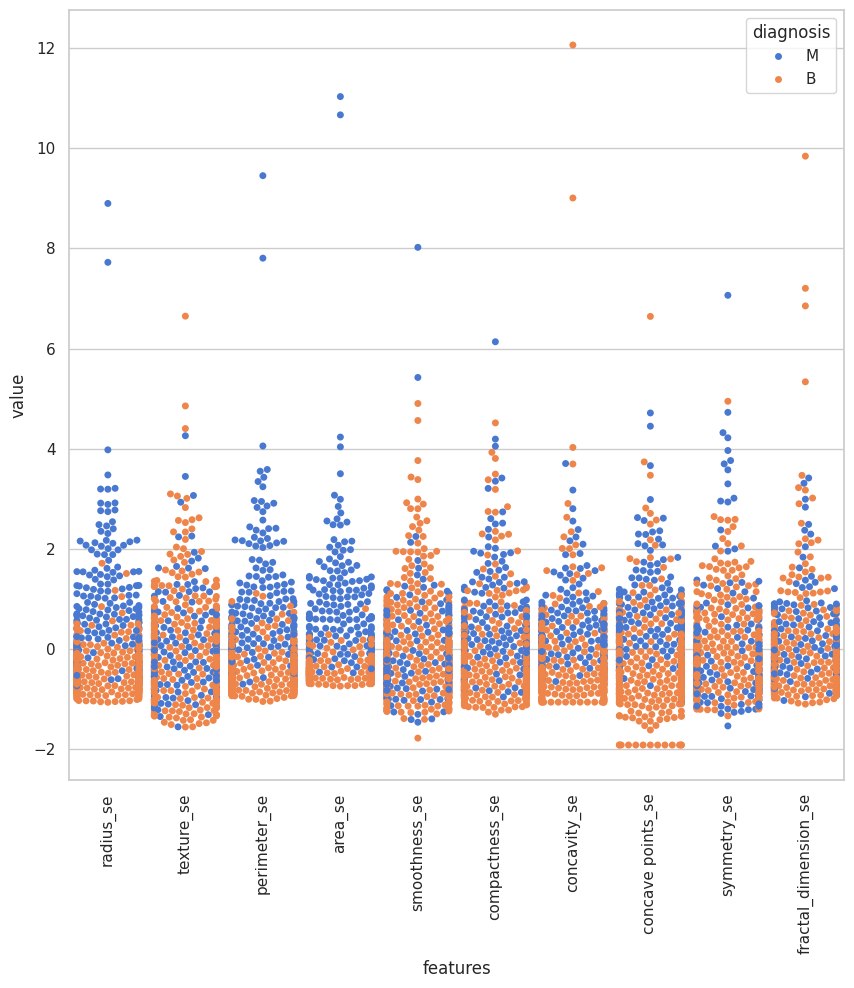

In [15]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  60.93222737312317  s


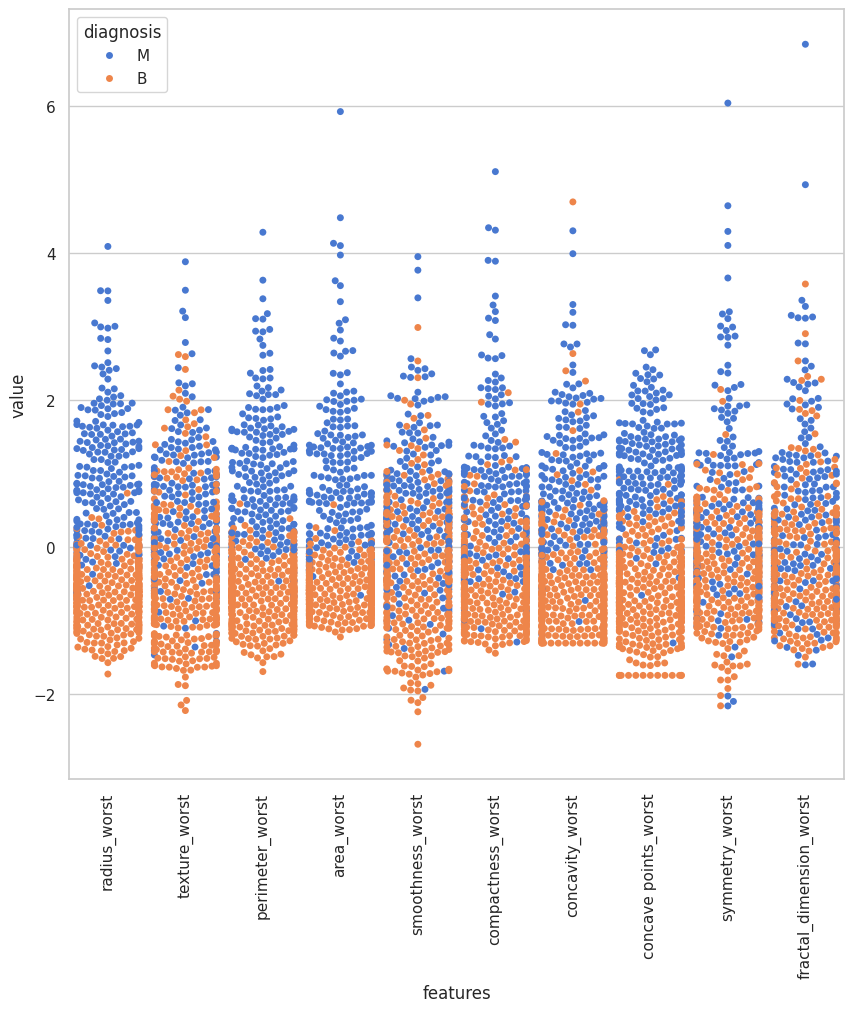

In [16]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

#### 5. Heatmap (Correlation Matrix)

 We use heatmap to observe all correlation between features.

<Axes: >

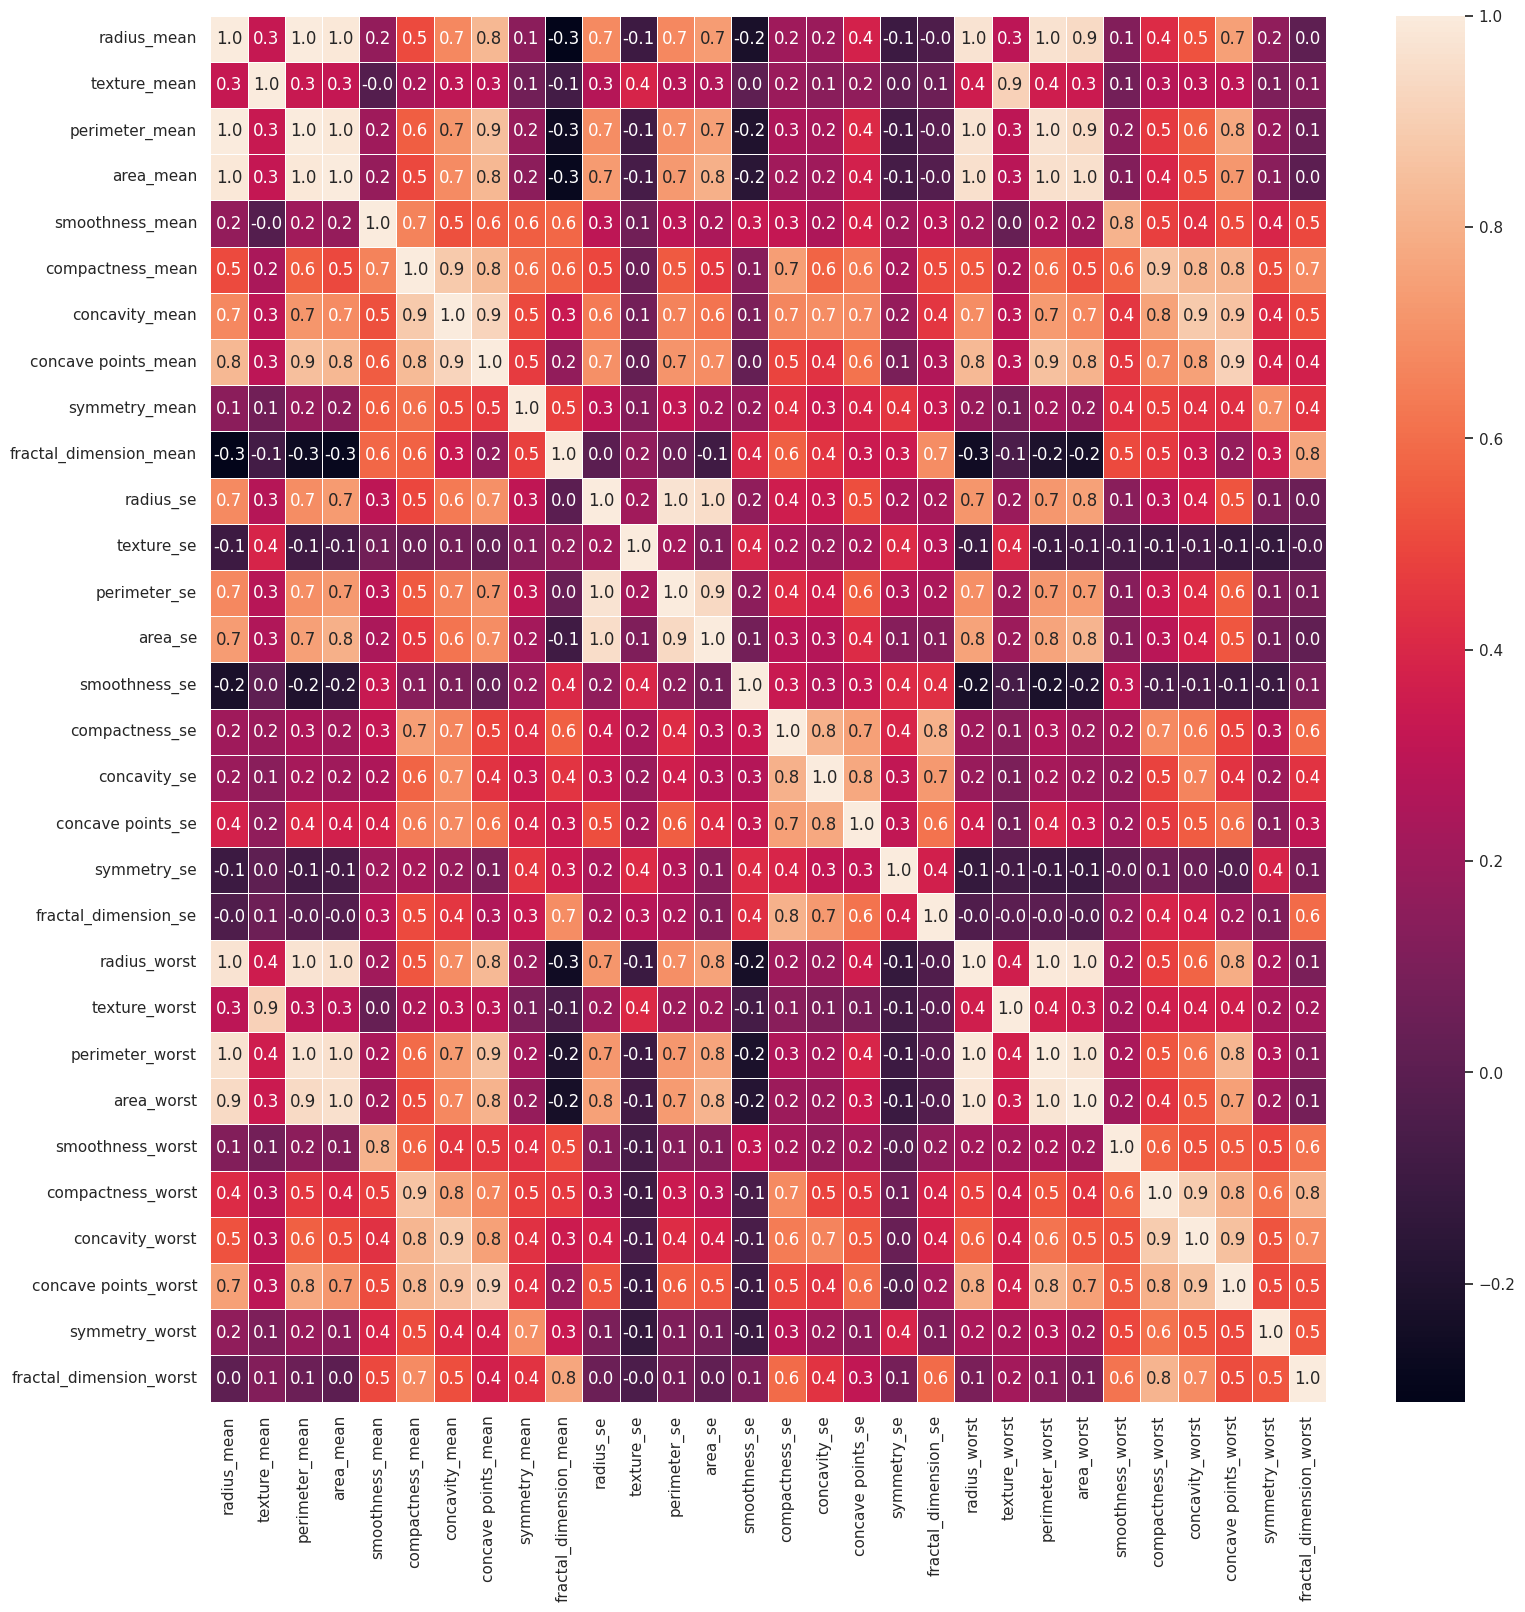

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## **2. Data Preprocessing**

### 2.1 Data Cleaning

We dropped three columns for the following reasons:
1. There is an id that cannot be used for classificaiton.
2. Diagnosis is our class label.
3. Unnamed: 32 feature includes NaN so we do not need it.



```
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()
```
* These columns are already dropped from the dataset.

### 2.2 Feature Creation

I added two new features to the dataset i.e volume and surface area and their respective columns.

These calculated features is a form of feature engineering that leverages domain knowledge to improve analytical capabilities, potentially revealing patterns that wouldn't be immediately apparent from the raw measurements alone.

In [18]:
x_processed = x.copy()

# Geometric features
x_processed['volume_mean']              = (4/3) * np.pi * (x_processed['radius_mean']  ** 3)
x_processed['volume_worst']             = (4/3) * np.pi * (x_processed['radius_worst'] ** 3)
x_processed['surface_area_mean']        = 4 * np.pi * (x_processed['radius_mean']  ** 2)
x_processed['surface_area_to_volume_ratio'] = (x_processed['surface_area_mean'] / x_processed['volume_mean'])

# Ratios worst/mean
x_processed['radius_ratio']             = x_processed['radius_worst']  / x_processed['radius_mean']
x_processed['area_ratio']               = x_processed['area_worst']    / x_processed['area_mean']
x_processed['compactness_ratio']        = x_processed['compactness_worst'] / x_processed['compactness_mean']
x_processed['concavity_ratio']          = x_processed['concavity_worst']   / x_processed['concavity_mean']
x_processed['concave_points_ratio']     = x_processed['concave points_worst'] / x_processed['concave points_mean']

# Absolute differences
x_processed['texture_difference']       = x_processed['texture_worst'] - x_processed['texture_mean']
x_processed['perimeter_difference']     = x_processed['perimeter_worst'] - x_processed['perimeter_mean']
x_processed['smoothness_change']        = x_processed['smoothness_worst'] - x_processed['smoothness_mean']
x_processed['symmetry_change']          = x_processed['symmetry_worst']   - x_processed['symmetry_mean']

# More ratios and derived metrics
x_processed['fractal_dimension_ratio']  = x_processed['fractal_dimension_worst'] / x_processed['fractal_dimension_mean']
x_processed['area_to_radius_mean']      = x_processed['area_mean'] / (x_processed['radius_mean'] ** 2)
x_processed['radius_se_to_mean_ratio']  = x_processed['radius_se'] / x_processed['radius_mean']
x_processed['area_se_to_area_mean_ratio'] = x_processed['area_se'] / x_processed['area_mean']
x_processed['perimeter_to_radius_ratio']  = x_processed['perimeter_mean'] / x_processed['radius_mean']
x_processed['mean_texture_to_symmetry_ratio'] = x_processed['texture_mean'] / x_processed['symmetry_mean']
x_processed['concavity_to_compactness_ratio'] = x_processed['concavity_mean'] / x_processed['compactness_mean']

new_features = [col for col in x_processed.columns if col not in x.columns]
new_dataset = x_processed[new_features]

new_dataset.to_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/extracted_features_dataset.csv', index=False)

In [19]:
new_dataset.head()

volume_mean  volume_worst  surface_area_mean  \
0  24388.332049  68479.954416        4066.981442   
1  36457.886149  65371.338545        5317.144310   
2  31976.119458  54848.828605        4871.932878   
3   6238.596842  13884.221697        1638.860817   
4  34989.259425  47967.860089        5173.374977   

   surface_area_to_volume_ratio  radius_ratio  area_ratio  compactness_ratio  \
0                      0.166759      1.410784    2.016983           2.397695   
1                      0.145843      1.214876    1.475113           2.372838   
2                      0.152362      1.197054    1.420615           2.654784   
3                      0.262697      1.305604    1.470344           3.051427   
4                      0.147856      1.110892    1.214341           1.543675   

   concavity_ratio  concave_points_ratio  texture_difference  \
0         2.372209              1.804215                6.95   
1         2.780207              2.650705                5.64   
2         2.281662              1.899922                4.28   
3         2.845485              2.447719                6.12   
4         2.020202              1.558006                2.33   

   perimeter_difference  smoothness_change  symmetry_change  \
0                 61.80            0.04380           0.2182   
1                 25.90            0.03906           0.0938   
2                 22.50            0.03480           0.1544   
3                 21.29            0.06730           0.4041   
4                 17.10            0.03710           0.0555   

   fractal_dimension_ratio  area_to_radius_mean  radius_se_to_mean_ratio  \
0                 1.510609             3.092942                 0.060867   
1                 1.570849             3.133826                 0.026422   
2                 1.459910             3.102946                 0.037867   
3                 1.775452             2.960517                 0.043398   
4                 1.305116             3.150474                 0.037319   

   area_se_to_area_mean_ratio  perimeter_to_radius_ratio  \
0                    0.153247                   6.826014   
1                    0.055867                   6.460865   
2                    0.078163                   6.602336   
3                    0.070526                   6.793345   
4                    0.072814                   6.658452   

   mean_texture_to_symmetry_ratio  concavity_to_compactness_ratio  
0                       42.910294                        1.081052  
1                       98.068433                        1.105036  
2                      102.706622                        1.234522  
3                       78.475164                        0.850299  
4                       79.270315                        1.490964

In [20]:
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### 2.3 Visualizations

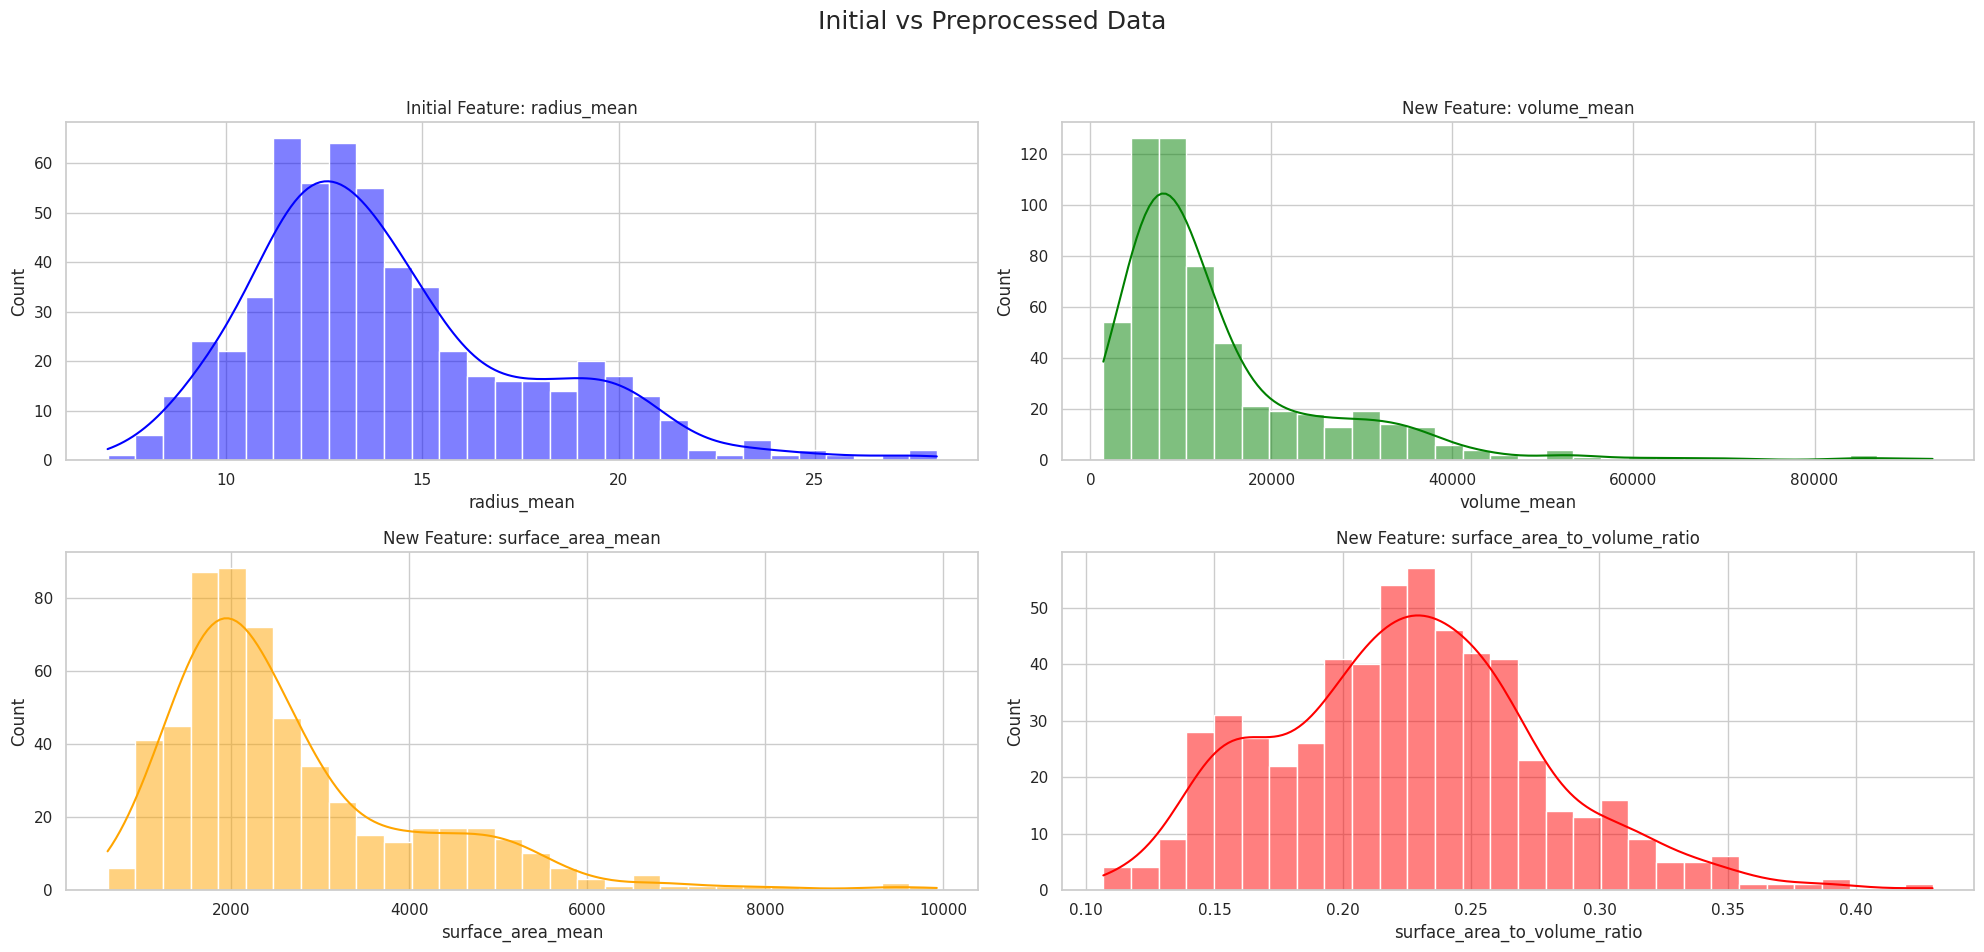

In [21]:
plt.figure(figsize=(20, 10))
plt.suptitle("Initial vs Preprocessed Data", fontsize=18)

# Plot 1: radius_mean
plt.subplot(2, 2, 1)
sns.histplot(x['radius_mean'], bins=30, kde=True, color='blue')
plt.title('Initial Feature: radius_mean')

# Plot 2: volume_mean
plt.subplot(2, 2, 2)
sns.histplot(x_processed['volume_mean'], bins=30, kde=True, color='green')
plt.title('New Feature: volume_mean')

# Plot 3: surface_area_mean
plt.subplot(2, 2, 3)
sns.histplot(x_processed['surface_area_mean'], bins=30, kde=True, color='orange')
plt.title('New Feature: surface_area_mean')

# Plot 4: surface_area_to_volume_ratio
plt.subplot(2, 2, 4)
sns.histplot(x_processed['surface_area_to_volume_ratio'], bins=30, kde=True, color='red')
plt.title('New Feature: surface_area_to_volume_ratio')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Graph Insights:**

1. The volume_mean histogram tends to be more skewed to the right. The transformation using the cubic function means that even small differences in radius lead to much larger differences in volume.

2. The distribution of surface_area_mean is calculated using the square of the radius. Its histogram usually shows a distribution that is between the linear scale of the radius and the cubic scale of the volume.

3. The histogram for surface_area_to_volume_ratio appears differently—its distribution may be somewhat left-skewed, reflecting how the ratio decreases as the cell radius increases.

4. The transformation to volume and surface area features allows models or analyses to capture nonlinear effects that the linear radius cannot.

### 2.4 Data Representation after Feature Extraction

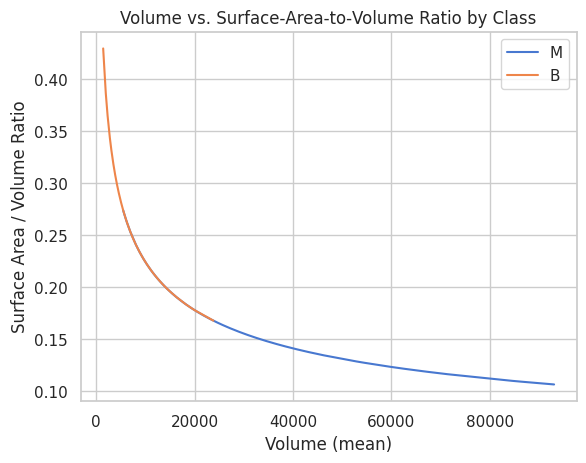

In [22]:
# 1. Load datasets
original = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/data.csv')
new_feats = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/extracted_features_dataset.csv')

# 2. Merge labels into new-features DataFrame
df = new_feats.copy()
df['diagnosis'] = original['diagnosis']  # ensure column is named 'diagnosis'

# 1️⃣ LINE CHART
plt.figure()
for cls in df['diagnosis'].unique():
    sub = df[df['diagnosis'] == cls].sort_values('volume_mean')
    plt.plot(
        sub['volume_mean'],
        sub['surface_area_to_volume_ratio'],
        label=cls
    )
plt.xlabel('Volume (mean)')
plt.ylabel('Surface Area / Volume Ratio')
plt.title('Volume vs. Surface‑Area‑to‑Volume Ratio by Class')
plt.legend()
plt.show()

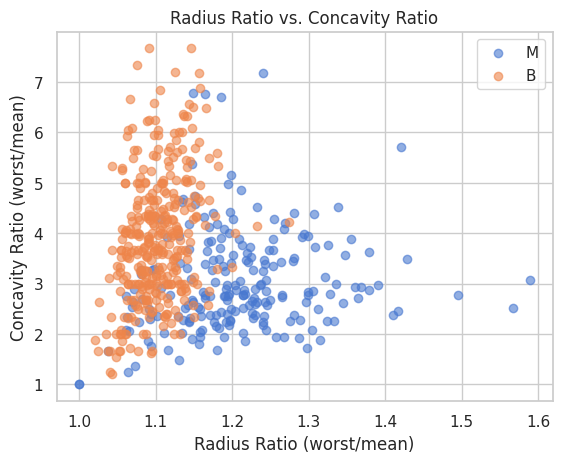

In [23]:
# 2️⃣ SCATTER PLOT
plt.figure()
for cls in df['diagnosis'].unique():
    sub = df[df['diagnosis'] == cls]
    plt.scatter(
        sub['radius_ratio'],
        sub['concavity_ratio'],
        alpha=0.6,
        label=cls
    )
plt.xlabel('Radius Ratio (worst/mean)')
plt.ylabel('Concavity Ratio (worst/mean)')
plt.title('Radius Ratio vs. Concavity Ratio')
plt.legend()
plt.show()

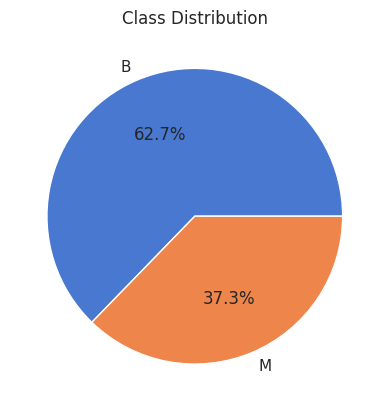

In [24]:
# 3️⃣ PIE CHART
counts = df['diagnosis'].value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

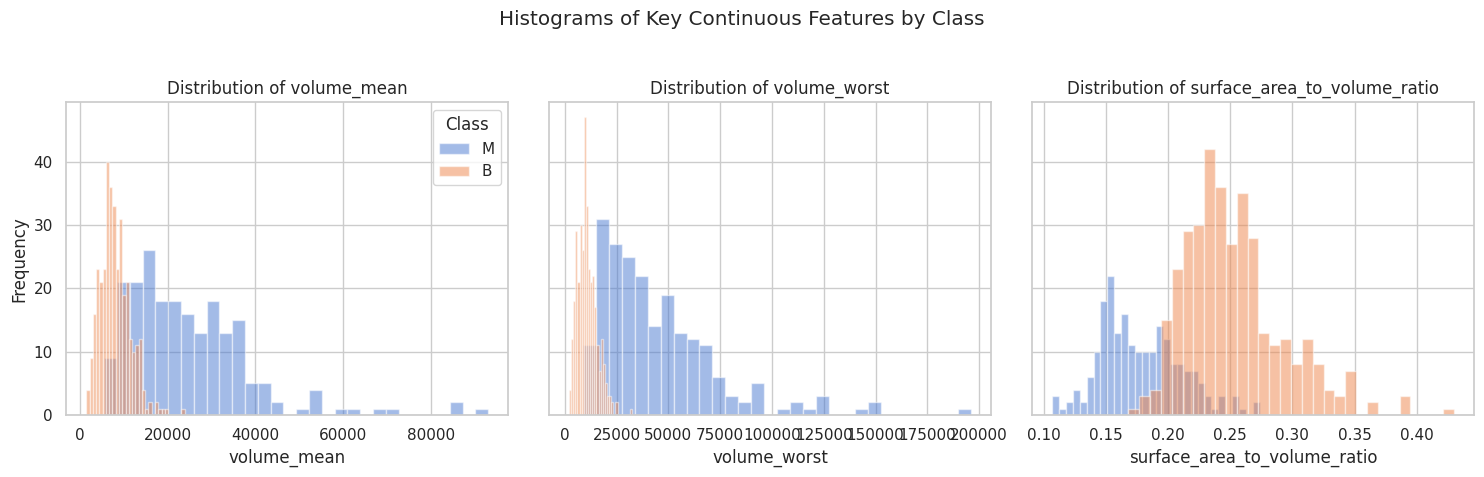

In [25]:
# 4️⃣ HISTOGRAMS (key continuous features) with subplots
key_feats = ['volume_mean', 'volume_worst', 'surface_area_to_volume_ratio']

fig, axes = plt.subplots(1, len(key_feats), figsize=(15, 5), sharey=True)
for ax, feat in zip(axes, key_feats):
    for cls in df['diagnosis'].unique():
        ax.hist(
            df[df['diagnosis'] == cls][feat].dropna(),
            bins=30,
            alpha=0.5,
            label=cls
        )
    ax.set_xlabel(feat)
    ax.set_title(f'Distribution of {feat}')

axes[0].set_ylabel('Frequency')
axes[0].legend(title='Class')
plt.suptitle('Histograms of Key Continuous Features by Class')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

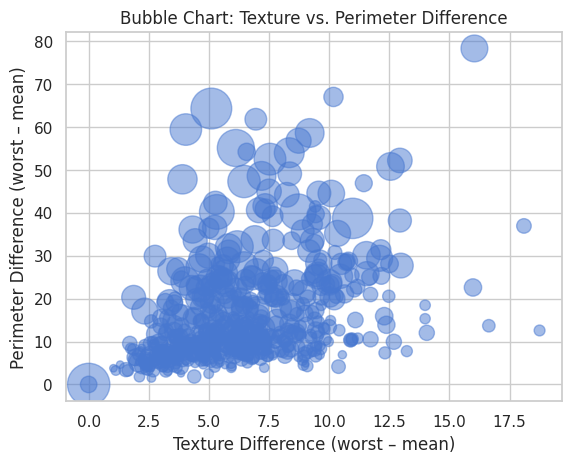

In [26]:
# 5️⃣ BUBBLE CHART
plt.figure()
plt.scatter(
    df['texture_difference'],
    df['perimeter_difference'],
    s = df['volume_mean'] / 100,  # scale down for visibility
    alpha=0.5
)
plt.xlabel('Texture Difference (worst – mean)')
plt.ylabel('Perimeter Difference (worst – mean)')
plt.title('Bubble Chart: Texture vs. Perimeter Difference')
plt.show()

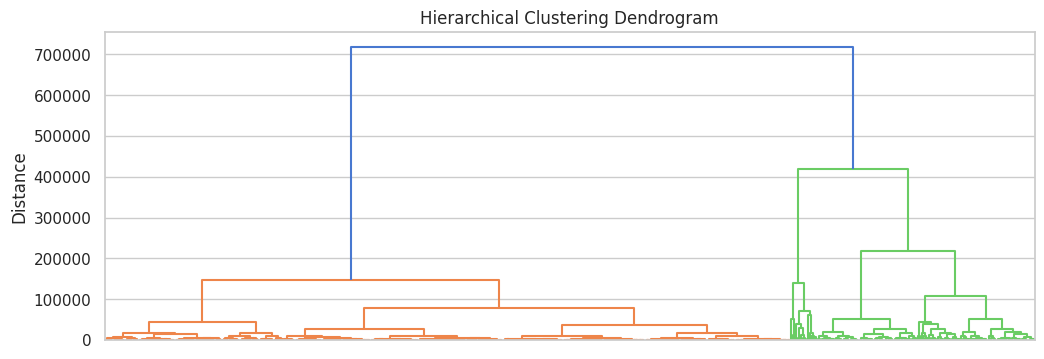

In [27]:
# 7️⃣ DENDROGRAM
X = df[new_feats.columns].dropna()
Z = linkage(X, method='ward')
plt.figure(figsize=(12, 4))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()

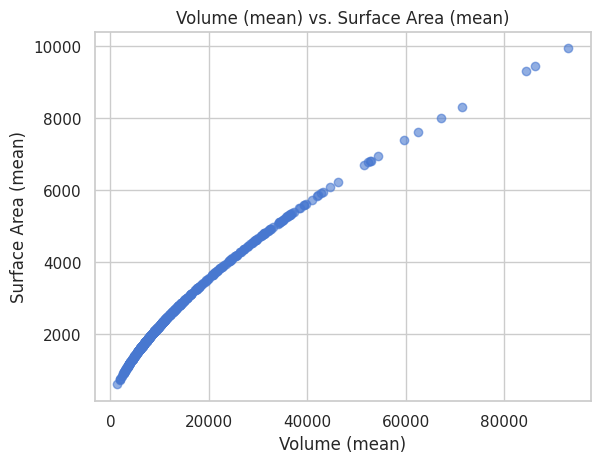

In [28]:
# 8️⃣ SCATTER PLOT
plt.figure()
plt.scatter(
    df['volume_mean'],
    df['surface_area_mean'],
    alpha=0.6
)
plt.xlabel('Volume (mean)')
plt.ylabel('Surface Area (mean)')
plt.title('Volume (mean) vs. Surface Area (mean)')
plt.show()

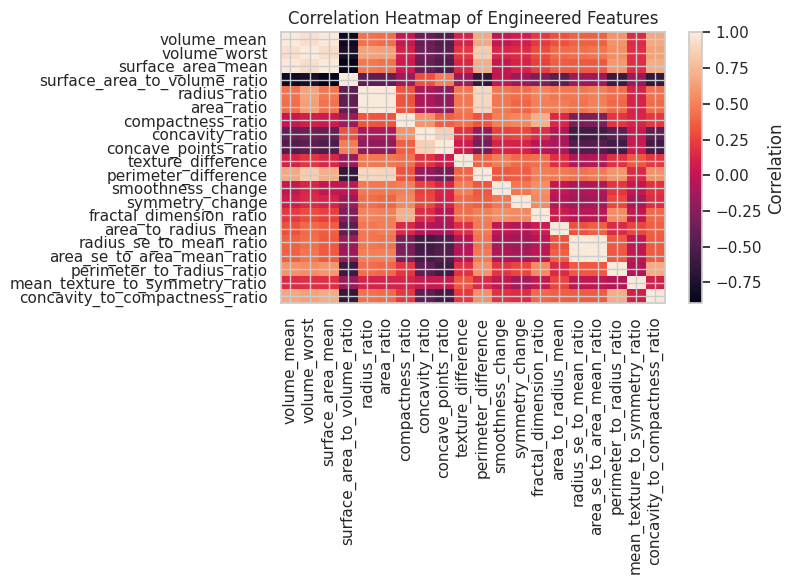

In [29]:
# 9️⃣ HEATMAP
corr = df[new_feats.columns].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap of Engineered Features')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

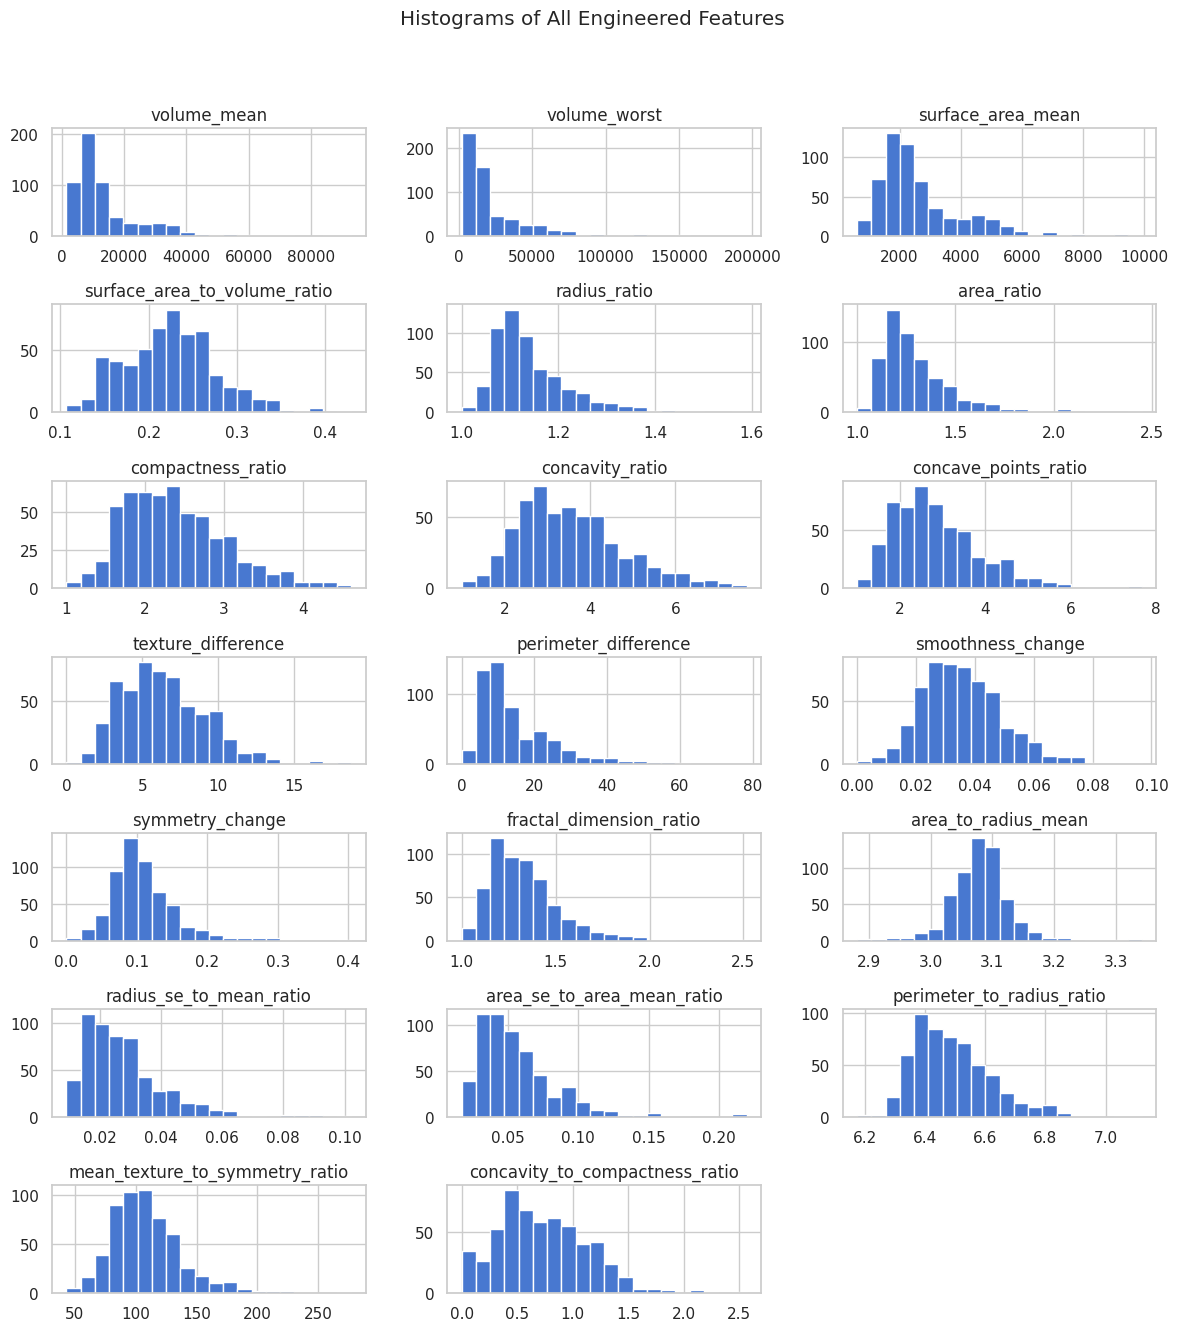

In [30]:
# 🔟 MULTIPLE HISTOGRAMS
plt.figure(figsize=(12, 10))
df[new_feats.columns].hist(bins=20, layout=(7, 3), figsize=(12, 14))
plt.suptitle('Histograms of All Engineered Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **3. Data Transformation and Statistical Analysis**

### 3.1 Feature selection

In [31]:
orig = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/data.csv')
X = pd.read_csv('/content/drive/MyDrive/Breast-Cancer-Classification-Using-Machine-Learning/extracted_features_dataset.csv')
y = orig['diagnosis'].map({'B': 0, 'M': 1})

#### 3.1.1 Mutual Information (MI) Feature Selection

In [32]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imp.fit_transform(X), columns=X.columns)
# 1. Mutual Information (MI)
mi_scores = mutual_info_classif(X_imp, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information scores:\n", mi_series)

Mutual Information scores:
 volume_worst                      0.454356
perimeter_difference              0.437204
volume_mean                       0.367719
surface_area_to_volume_ratio      0.366972
surface_area_mean                 0.366045
concavity_to_compactness_ratio    0.354244
radius_ratio                      0.323572
area_ratio                        0.289580
perimeter_to_radius_ratio         0.271560
concave_points_ratio              0.235119
fractal_dimension_ratio           0.151107
concavity_ratio                   0.137083
area_to_radius_mean               0.118398
area_se_to_area_mean_ratio        0.100740
radius_se_to_mean_ratio           0.093558
texture_difference                0.066424
compactness_ratio                 0.048550
symmetry_change                   0.047898
mean_texture_to_symmetry_ratio    0.034428
smoothness_change                 0.022890
dtype: float64


#### 3.1.2 Recursive Feature Elimination (RFE)

In [33]:
# 2. Recursive Feature Elimination (RFE) – top 10 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split into train/test to avoid overfitting during selection
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42
)

# Use a simple estimator (logistic regression) for RFE
estimator = LogisticRegression(max_iter=1000, solver='liblinear')
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Get the mask of selected features
selected_mask = selector.support_
selected_features = X.columns[selected_mask].tolist()

print("Top 10 features selected by RFE:")
print(selected_features)

Top 10 features selected by RFE:
['surface_area_to_volume_ratio', 'radius_ratio', 'concavity_ratio', 'concave_points_ratio', 'texture_difference', 'perimeter_difference', 'symmetry_change', 'area_to_radius_mean', 'perimeter_to_radius_ratio', 'concavity_to_compactness_ratio']


#### 3.1.3 Embedded Method – Feature Importance via Random Forest

In [34]:
# 3. Embedded Method – Feature Importance via Random Forest
from sklearn.ensemble import RandomForestClassifier
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract and sort feature importances
importances = rf.feature_importances_
imp_series = pd.Series(importances, index=X.columns)
imp_series = imp_series.sort_values(ascending=False)

print("Random Forest feature importances:")
print(imp_series)


Random Forest feature importances:
volume_worst                      0.164875
perimeter_difference              0.156886
concavity_to_compactness_ratio    0.129636
volume_mean                       0.087317
surface_area_mean                 0.084290
area_ratio                        0.073709
radius_ratio                      0.070534
surface_area_to_volume_ratio      0.066794
perimeter_to_radius_ratio         0.030825
concave_points_ratio              0.020315
texture_difference                0.018585
fractal_dimension_ratio           0.018003
symmetry_change                   0.015161
concavity_ratio                   0.010960
compactness_ratio                 0.010136
area_se_to_area_mean_ratio        0.009791
radius_se_to_mean_ratio           0.009129
smoothness_change                 0.008952
mean_texture_to_symmetry_ratio    0.008028
area_to_radius_mean               0.006074
dtype: float64


These are the features seletecd:
volume_worst
* Largest estimated tumor volume (4/3·π·radius_worst³)
* Tops both MI and RF rankings, captures extreme size.

perimeter_difference
* Δ between worst and mean boundary lengths
* Second in MI & RF, highlights boundary growth.

volume_mean
* Average tumor volume (4/3·π·radius_mean³)
* Strong geometric size indicator.

surface_area_to_volume_ratio
* surface_area_mean ÷ volume_mean
* Balances shape vs. size, differentiates growth patterns.

surface_area_mean
* Average surface area (4·π·radius_mean²)
* Complements volume_mean for shape insights.

concavity_to_compactness_ratio
* concavity_mean ÷ compactness_mean
* Embeds shape irregularity relative to compactness.

radius_ratio
* radius_worst ÷ radius_mean
* Simple scale factor of worst vs. average radius.

concave_points_ratio
* concave points_worst ÷ concave points_mean
* Emphasizes the increase in inward indentations.

perimeter_to_radius_ratio
* perimeter_mean ÷ radius_mean
* A shape‐complexity metric linking boundary to size.

### 3.2 Feature Extraction with PCA

We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

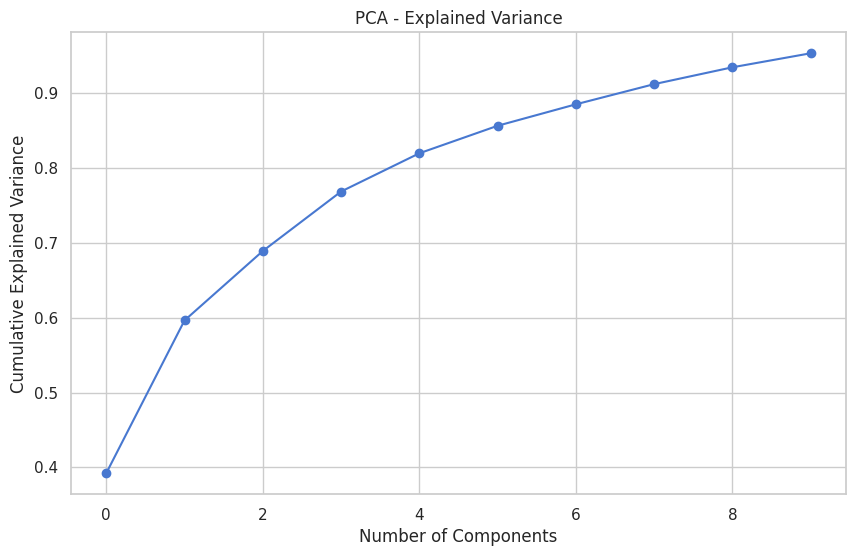

📌 Top contributing original features to each principal component:

PC1: perimeter_difference, volume_worst, surface_area_mean
PC2: compactness_ratio, concavity_ratio, smoothness_change
PC3: area_se_to_area_mean_ratio, radius_se_to_mean_ratio, area_ratio
PC4: mean_texture_to_symmetry_ratio, area_to_radius_mean, perimeter_to_radius_ratio
PC5: mean_texture_to_symmetry_ratio, texture_difference, concavity_ratio
PC6: area_to_radius_mean, compactness_ratio, concavity_to_compactness_ratio
PC7: area_to_radius_mean, concave_points_ratio, volume_mean
PC8: smoothness_change, symmetry_change, radius_se_to_mean_ratio
PC9: texture_difference, mean_texture_to_symmetry_ratio, concavity_to_compactness_ratio
PC10: symmetry_change, smoothness_change, texture_difference


In [36]:
# 1. Split data
x_train, x_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, random_state=42)

# 2. Z-score Normalization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 3. PCA to retain 95% variance
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# 4. Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

# 5. Create a DataFrame for component loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=X_imp.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# 6. Display top 3 contributing features for each PC
top_features = {}
for pc in loadings.index:
    top = loadings.loc[pc].abs().sort_values(ascending=False).head(3)
    top_features[pc] = top.index.tolist()

print("📌 Top contributing original features to each principal component:\n")
for pc, features in top_features.items():
    print(f"{pc}: {', '.join(features)}")

Final Feature Count: 8 principal components after applying PCA.

1. texture_difference

2. mean_texture_to_symmetry_ratio

3. smoothness_change

4. area_to_radius_mean

5. symmetry_change

6. concavity_ratio

7. compactness_ratio

8. radius_se_to_mean_ratio

In [56]:
# ✅ Final 8 selected features
final_features = [
    'texture_difference',
    'mean_texture_to_symmetry_ratio',
    'smoothness_change',
    'area_to_radius_mean',
    'symmetry_change',
    'concavity_ratio',
    'compactness_ratio',
    'radius_se_to_mean_ratio',
]

# 🆕 Create x_1 with these columns
x_1 = df[final_features].copy()

# 🔍 Quick preview
x_1.head()

texture_difference  mean_texture_to_symmetry_ratio  smoothness_change  \
0                6.95                       42.910294            0.04380   
1                5.64                       98.068433            0.03906   
2                4.28                      102.706622            0.03480   
3                6.12                       78.475164            0.06730   
4                2.33                       79.270315            0.03710   

   area_to_radius_mean  symmetry_change  concavity_ratio  compactness_ratio  \
0             3.092942           0.2182         2.372209           2.397695   
1             3.133826           0.0938         2.780207           2.372838   
2             3.102946           0.1544         2.281662           2.654784   
3             2.960517           0.4041         2.845485           3.051427   
4             3.150474           0.0555         2.020202           1.543675   

   radius_se_to_mean_ratio  
0                 0.060867  
1                 0.026422  
2                 0.037867  
3                 0.043398  
4                 0.037319

### 3.3 Hypothesis Testing

In [38]:
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, StandardScaler
from scipy.stats import chi2_contingency, ttest_ind, ranksums, f_oneway
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.05
imp = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imp.fit_transform(x_1), columns=x_1.columns)

#### 3.3.1 Chi‑Square Test

* Null Hypothesis (H₀): There is no association between the binned texture_difference (e.g. Low/Medium/High) and the diagnosis (benign vs. malignant).

* Alternative Hypothesis (H₁): There is an association between the binned texture_difference and diagnosis.

* Conclusion: If the computed p‑value < 0.05, we reject H₀ — implying a statistically significant link between texture_difference category and cancer class.

In [39]:
# 1️⃣ Chi‑Square Test on binned texture_difference
disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned = disc.fit_transform(X_imp[['texture_difference']]).astype(int).ravel()
contingency = pd.crosstab(binned, y)
chi2_stat, chi2_p, _, _ = chi2_contingency(contingency)
print(f"Chi‑Square: p = {chi2_p:.3e} → {'reject H0' if chi2_p < alpha else 'fail to reject H0'}")

Chi‑Square: p = 6.004e-11 → reject H0


#### 3.3.2 T‑Test

* Null Hypothesis (H₀): There is no significant difference in the mean texture_difference between the two diagnosis groups (0 = benign, 1 = malignant).

* Alternative Hypothesis (H₁): There is a significant difference in the mean texture_difference between benign and malignant tumors.

* Conclusion: A p‑value < 0.05 → reject H₀, indicating the average texture_difference differs significantly across classes.

In [40]:
# 2️⃣ T‑Test for each feature
g0 = X_imp[y == 0]
g1 = X_imp[y == 1]
for feat in X_imp.columns:
    t_stat, t_p = ttest_ind(g0[feat], g1[feat], nan_policy='omit')
    print(f"T‑Test ({feat}): p = {t_p:.3e} → {'reject H0' if t_p < alpha else 'fail to reject H0'}")

T‑Test (texture_difference): p = 7.008e-19 → reject H0
T‑Test (mean_texture_to_symmetry_ratio): p = 1.801e-04 → reject H0
T‑Test (smoothness_change): p = 3.187e-15 → reject H0
T‑Test (area_to_radius_mean): p = 1.576e-18 → reject H0
T‑Test (symmetry_change): p = 2.153e-18 → reject H0
T‑Test (concavity_ratio): p = 3.325e-16 → reject H0
T‑Test (compactness_ratio): p = 2.106e-08 → reject H0
T‑Test (radius_se_to_mean_ratio): p = 9.392e-19 → reject H0
T‑Test (concavity_to_compactness_ratio): p = 9.628e-83 → reject H0


#### 3.3.3 t‑SNE Visualization

* Purpose: Project the 9-dimensional feature space down to 2D, revealing any natural clustering by diagnosis.

* Conclusion: Well‑separated clusters in the t‑SNE plot suggest that the final features embed enough structure to distinguish benign vs. malignant.

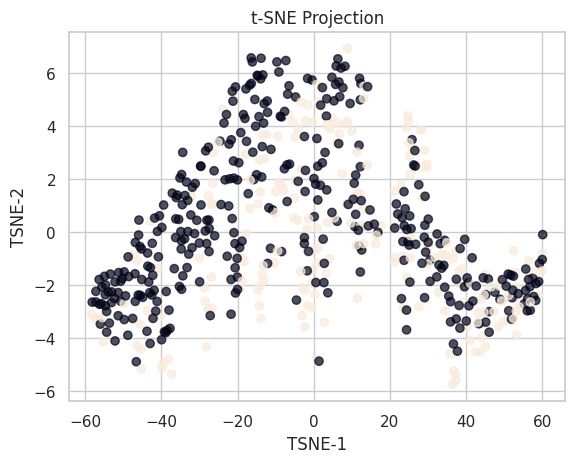

t‑SNE: inspect plot for cluster separation between classes


In [41]:
# 3️⃣ t‑SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
proj = tsne.fit_transform(X_imp)
plt.figure()
plt.scatter(proj[:,0], proj[:,1], c=y, alpha=0.7)
plt.xlabel('TSNE-1'); plt.ylabel('TSNE-2'); plt.title('t-SNE Projection')
plt.show()
print("t‑SNE: inspect plot for cluster separation between classes")

#### 3.3.4 Wilcoxon Rank‑Sum Test

* Null Hypothesis (H₀): The median texture_difference is the same in both diagnosis groups.

* Alternative Hypothesis (H₁): The median texture_difference differs between benign and malignant groups.

* Conclusion: If p‑value < 0.05 → reject H₀, showing a statistically significant shift in median texture_difference between classes.

In [42]:
# 4️⃣ Wilcoxon Rank‑Sum Test
for feat in X_imp.columns:
    w_stat, w_p = ranksums(g0[feat], g1[feat])
    print(f"Wilcoxon ({feat}): p = {w_p:.3e} → {'reject H0' if w_p < alpha else 'fail to reject H0'}")

Wilcoxon (texture_difference): p = 2.162e-17 → reject H0
Wilcoxon (mean_texture_to_symmetry_ratio): p = 1.186e-06 → reject H0
Wilcoxon (smoothness_change): p = 3.674e-15 → reject H0
Wilcoxon (area_to_radius_mean): p = 1.678e-19 → reject H0
Wilcoxon (symmetry_change): p = 8.295e-15 → reject H0
Wilcoxon (concavity_ratio): p = 1.758e-17 → reject H0
Wilcoxon (compactness_ratio): p = 2.399e-09 → reject H0
Wilcoxon (radius_se_to_mean_ratio): p = 3.734e-20 → reject H0
Wilcoxon (concavity_to_compactness_ratio): p = 7.068e-68 → reject H0


#### 3.3.5 ANOVA Test

* Null Hypothesis (H₀): The means of mean_texture_to_symmetry_ratio are equal across three binned categories of texture_difference (Low/Medium/High).

* Alternative Hypothesis (H₁): At least one category’s mean_texture_to_symmetry_ratio differs from the others.

* Conclusion: p‑value < 0.05 → reject H₀, indicating that mean_texture_to_symmetry_ratio varies significantly across texture_difference bins.

In [43]:
# 5️⃣ ANOVA Test
for feat in X_imp.columns:
    a_stat, a_p = f_oneway(g0[feat], g1[feat])
    print(f"ANOVA ({feat}): p = {a_p:.3e} → {'reject H0' if a_p < alpha else 'fail to reject H0'}")

ANOVA (texture_difference): p = 7.008e-19 → reject H0
ANOVA (mean_texture_to_symmetry_ratio): p = 1.801e-04 → reject H0
ANOVA (smoothness_change): p = 3.187e-15 → reject H0
ANOVA (area_to_radius_mean): p = 1.576e-18 → reject H0
ANOVA (symmetry_change): p = 2.153e-18 → reject H0
ANOVA (concavity_ratio): p = 3.325e-16 → reject H0
ANOVA (compactness_ratio): p = 2.106e-08 → reject H0
ANOVA (radius_se_to_mean_ratio): p = 9.392e-19 → reject H0
ANOVA (concavity_to_compactness_ratio): p = 9.628e-83 → reject H0


## **4. Model Implementation**

### 4.1 Random Forest Classification

The Random Forest Classifier by default does not apply any specific strategy to address class imbalance. It builds multiple decision trees using bootstrap samples, and each tree is built without being explicitly told to balance class weights. This means that if one class appears more frequently than another, the model may favor the majority class in its predictions.



Accuracy is: 0.9649122807017544


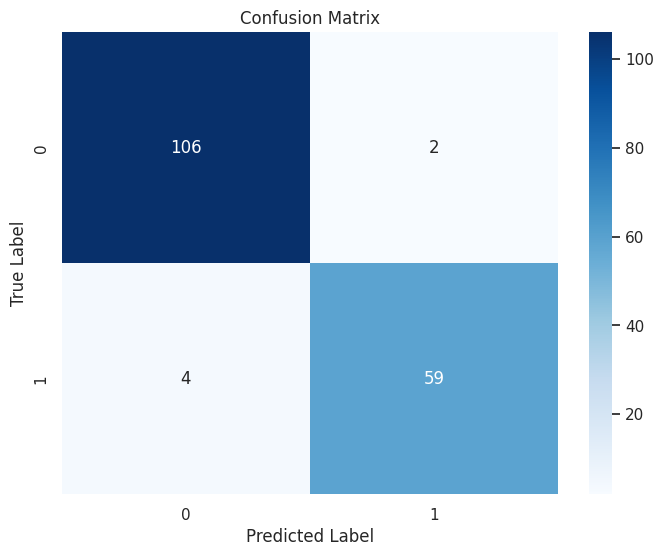


Classification Report:
              precision    recall  f1-score     support
0              0.963636  0.981481  0.972477  108.000000
1              0.967213  0.936508  0.951613   63.000000
accuracy       0.964912  0.964912  0.964912    0.964912
macro avg      0.965425  0.958995  0.962045  171.000000
weighted avg   0.964954  0.964912  0.964790  171.000000


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier (default n_estimators=10)
clf_rf = RandomForestClassifier(random_state=43)
clf_rf.fit(x_train, y_train)

accuracy_score_rf = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is:', accuracy_score_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, clf_rf.predict(x_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, clf_rf.predict(x_test), output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

### 4.2 Logistic Regression

Logistic Regression is a popular choice for classification tasks because it models the probability of an instance belonging to a particular class using the logistic (sigmoid) function. This makes it especially useful for binary classification problems.

Accuracy: 0.9649122807017544


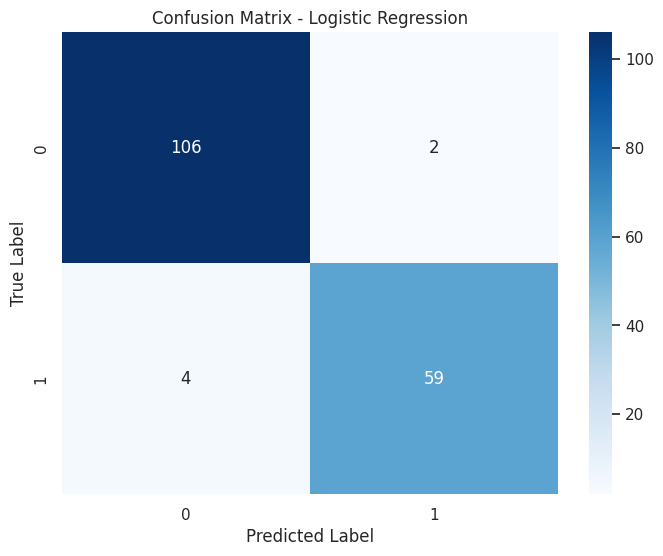


Classification Report:
              precision    recall  f1-score     support
0              0.963636  0.981481  0.972477  108.000000
1              0.967213  0.936508  0.951613   63.000000
accuracy       0.964912  0.964912  0.964912    0.964912
macro avg      0.965425  0.958995  0.962045  171.000000
weighted avg   0.964954  0.964912  0.964790  171.000000


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(x_train, y_train)

predictions = lr_model.predict(x_test)

# Calculate Accuracy
accuracy_score_lr = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score_lr)

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate Classification Report and display it as a table
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

By default, Logistic Regression does not adjust for class imbalance. However, if there is a class imbalance issue, we specified the parameter class_weight='balanced' when initializing the model. This parameter automatically adjusts the weights inversely proportional to class frequencies to mitigate bias towards the majority class.

### 4.3 Xgboost Classification

XGBoost is known for its high performance and speed, especially on structured or tabular datasets. It uses gradient boosting on decision trees to capture complex interactions in the data efficiently.

Accuracy: 0.9707602339181286


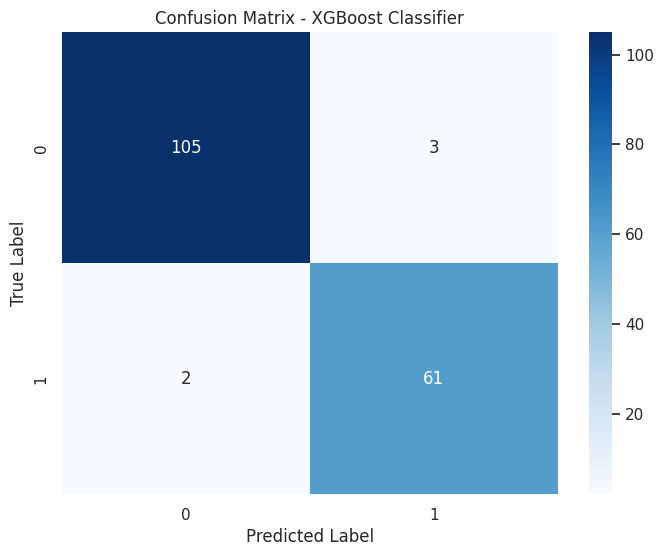


Classification Report:
              precision    recall  f1-score    support
0              0.981308  0.972222  0.976744  108.00000
1              0.953125  0.968254  0.960630   63.00000
accuracy       0.970760  0.970760  0.970760    0.97076
macro avg      0.967217  0.970238  0.968687  171.00000
weighted avg   0.970925  0.970760  0.970807  171.00000


In [46]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Split the dataset: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train_encoded) # Use encoded target variable for training

# Predictions on the test data (using encoded test data)
predictions = xgb_model.predict(x_test)

# Decode predictions back to original labels for evaluation
decoded_predictions = label_encoder.inverse_transform(predictions)

# Calculate accuracy (using decoded predictions)
accuracy_score_xg = accuracy_score(y_test, decoded_predictions)
print("Accuracy:", accuracy_score_xg)

# Plot Confusion Matrix (using decoded predictions)
cm_xg = confusion_matrix(y_test, decoded_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate Classification Report (using decoded predictions) and display as table
report = classification_report(y_test, decoded_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

XGBoost does not automatically solve class imbalance problems. However, you can address imbalance by adjusting the parameter scale_pos_weight (commonly used in binary classification) to assign a higher weight to the minority class.

### 4.4 Decision Tree (DecisionTreeClassifier)

Decision Tree Accuracy: 0.9239766081871345


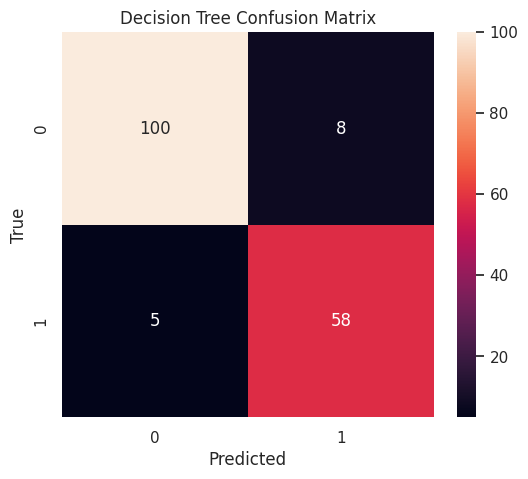

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=43)
clf_dt.fit(x_train, y_train)

accuracy_score_dt = accuracy_score(y_test, clf_dt.predict(x_test))
print('Decision Tree Accuracy:', accuracy_score_dt)

cm_dt = confusion_matrix(y_test, clf_dt.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_dt.predict(x_test)))

### 4.5 KNN (KNeighborsClassifier)

KNN Accuracy: 0.9590643274853801


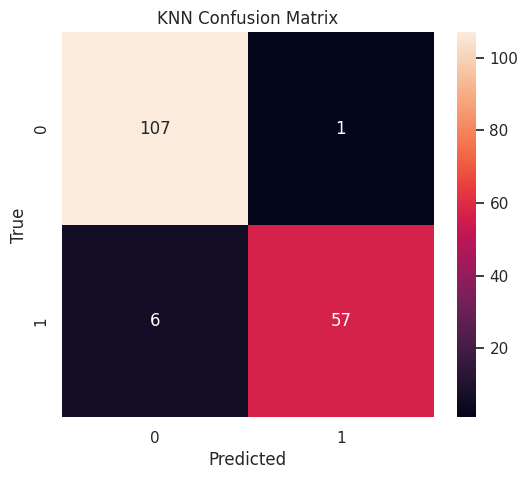

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [48]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train, y_train)

accuracy_score_knn = accuracy_score(y_test, clf_knn.predict(x_test))
print('KNN Accuracy:', accuracy_score_knn)

cm_knn = confusion_matrix(y_test, clf_knn.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt="d")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_knn.predict(x_test)))

### 4.6 Support Vector Machine (SVM)

SVM Accuracy: 0.935672514619883


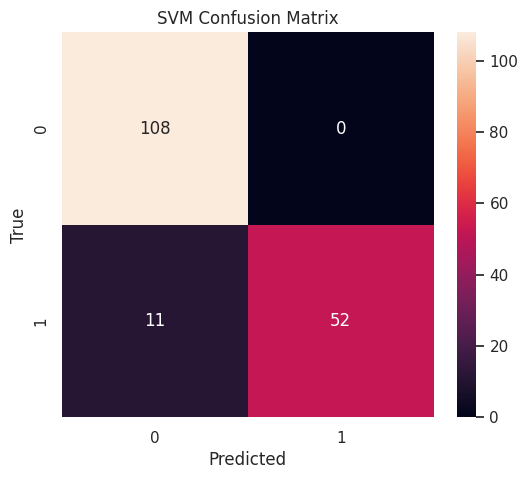

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       108
           1       1.00      0.83      0.90        63

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [49]:
# Support Vector Machine
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_svc = SVC(kernel='rbf', probability=True, random_state=43)
clf_svc.fit(x_train, y_train)

accuracy_score_svc = accuracy_score(y_test, clf_svc.predict(x_test))
print('SVM Accuracy:', accuracy_score_svc)

cm_svc = confusion_matrix(y_test, clf_svc.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_svc, annot=True, fmt="d")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_svc.predict(x_test)))

### 4.7 Gaussian Naive Bayes (GaussianNB)

GaussianNB Accuracy: 0.9415204678362573


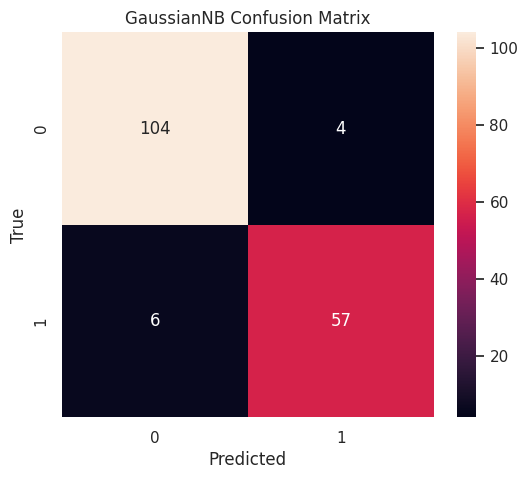

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [50]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)

accuracy_score_gnb = accuracy_score(y_test, clf_gnb.predict(x_test))
print('GaussianNB Accuracy:', accuracy_score_gnb)

cm_gnb = confusion_matrix(y_test, clf_gnb.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_gnb, annot=True, fmt="d")
plt.title("GaussianNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_gnb.predict(x_test)))

### 4.8 AdaBoost (AdaBoostClassifier)

AdaBoost Accuracy: 0.9707602339181286


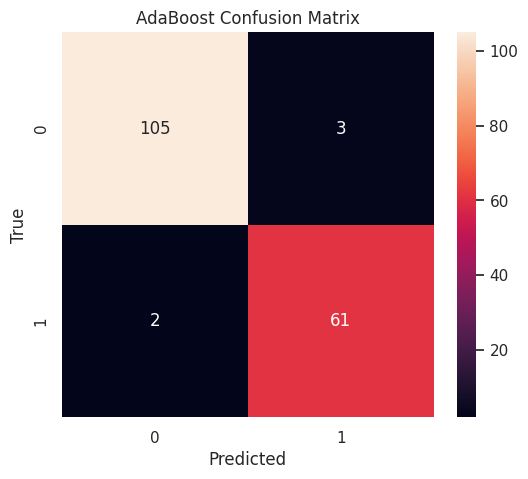

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [51]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_ab = AdaBoostClassifier(n_estimators=50, random_state=43)
clf_ab.fit(x_train, y_train)

accuracy_score_ab = accuracy_score(y_test, clf_ab.predict(x_test))
print('AdaBoost Accuracy:', accuracy_score_ab)

cm_ab = confusion_matrix(y_test, clf_ab.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_ab, annot=True, fmt="d")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_ab.predict(x_test)))

### 4.9 Gradient Boosting (GradientBoostingClassifier)

Gradient Boosting Accuracy: 0.9590643274853801


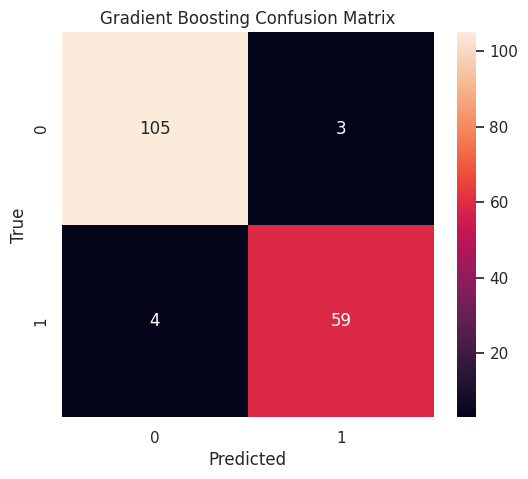

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [52]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=43)
clf_gb.fit(x_train, y_train)

accuracy_score_gb = accuracy_score(y_test, clf_gb.predict(x_test))
print('Gradient Boosting Accuracy:', accuracy_score_gb)

cm_gb = confusion_matrix(y_test, clf_gb.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt="d")
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_gb.predict(x_test)))

### 4.10 Multilayer Perceptron (MLPClassifier)

MLP Accuracy: 0.9707602339181286


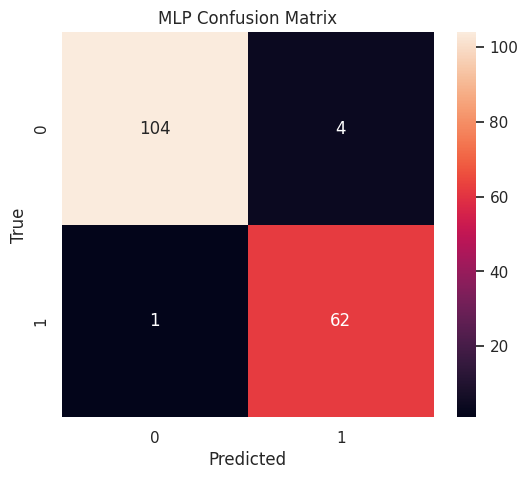

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [53]:
# Multilayer Perceptron
from sklearn.neural_network import MLPClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf_mlp = MLPClassifier(hidden_layer_sizes=(50,25), max_iter=500, random_state=43)
clf_mlp.fit(x_train, y_train)

accuracy_score_mlp = accuracy_score(y_test, clf_mlp.predict(x_test))
print('MLP Accuracy:', accuracy_score_mlp)

cm_mlp = confusion_matrix(y_test, clf_mlp.predict(x_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm_mlp, annot=True, fmt="d")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, clf_mlp.predict(x_test)))

## **5. Results and Comparisons**

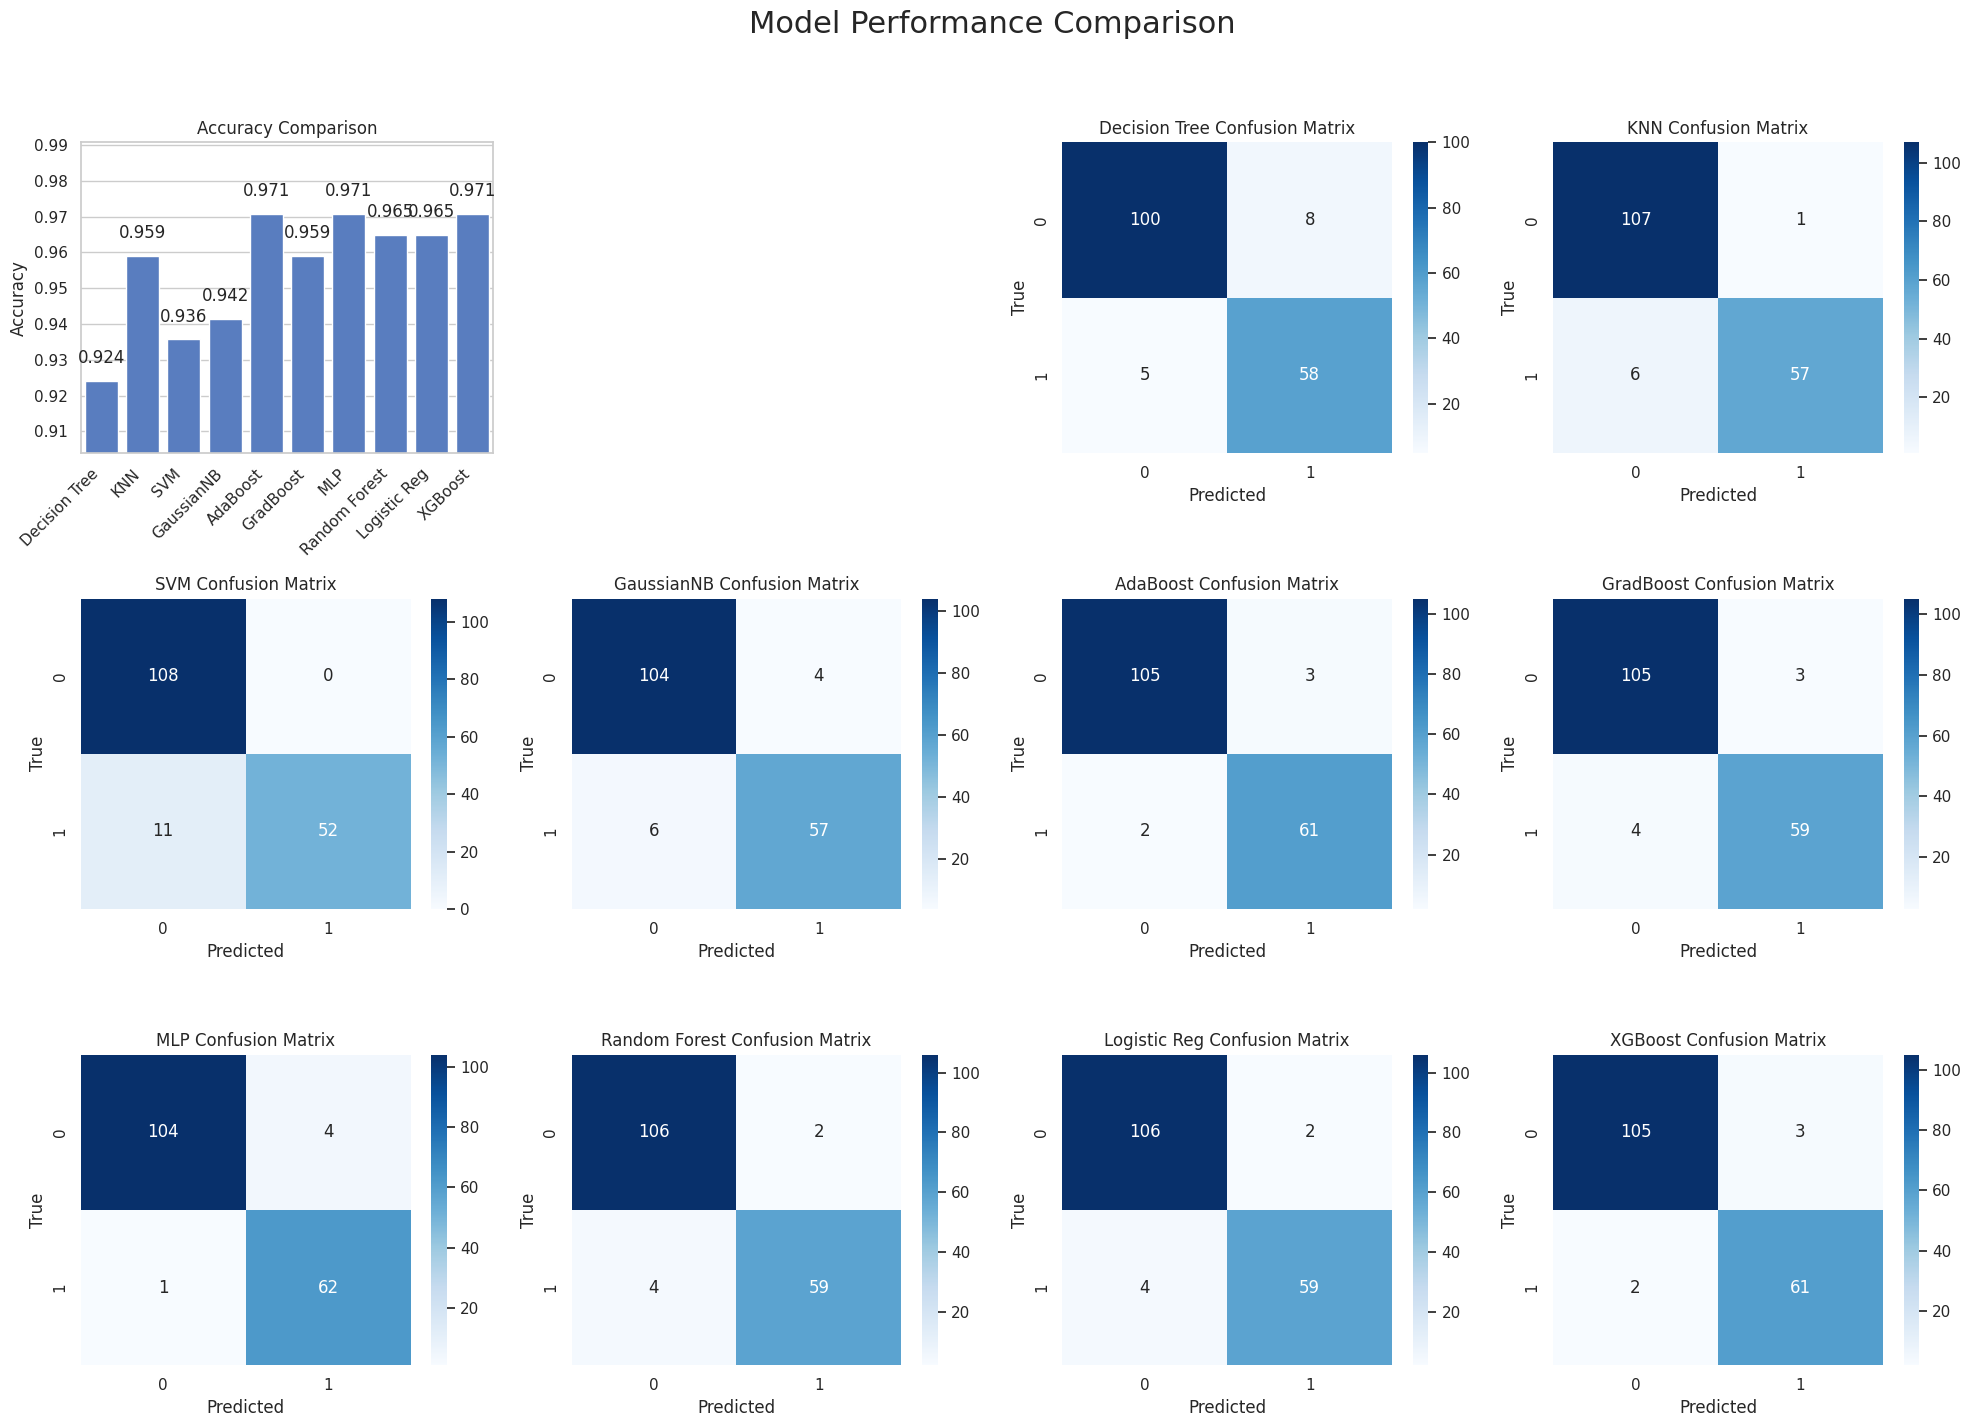

In [54]:
models = [
    'Decision Tree', 'KNN', 'SVM', 'GaussianNB',
    'AdaBoost', 'GradBoost', 'MLP',
    'Random Forest', 'Logistic Reg', 'XGBoost'
]
accuracies = [
    accuracy_score_dt, accuracy_score_knn, accuracy_score_svc, accuracy_score_gnb,
    accuracy_score_ab, accuracy_score_gb, accuracy_score_mlp,
    accuracy_score_rf, accuracy_score_lr, accuracy_score_xg
]
cms = [
    cm_dt, cm_knn, cm_svc, cm_gnb,
    cm_ab, cm_gb, cm_mlp,
    cm_rf, cm_lr, cm_xg
]
cm_cmaps = [
    "Blues","Blues","Blues","Blues",
    "Blues","Blues","Blues",
    "Blues","Blues","Blues"
]

# Create 3×4 grid (first plot is bar chart, next 10 are confusion matrices)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle("Model Performance Comparison", fontsize=22)

# 1️⃣ Bar chart of accuracies
ax0 = axes[0, 0]
sns.barplot(x=models, y=accuracies, ax=ax0)
ax0.set_title("Accuracy Comparison")
ax0.set_ylabel("Accuracy")
ax0.set_ylim(min(accuracies) - 0.02, max(accuracies) + 0.02)
for i, acc in enumerate(accuracies):
    ax0.text(i, acc + 0.005, f"{acc:.3f}", ha='center')
ax0.set_xticklabels(models, rotation=45, ha='right')

# Turn off empty subplot [0,1]
axes[0,1].axis('off')

# 2️⃣–🔟 Confusion matrices
idx = 0
for row in range(0, 3):
    for col in range(2, 4) if row == 0 else range(0, 4):
        if row == 0 and col < 2:
            continue
        if idx >= len(models):
            axes[row, col].axis('off')
        else:
            sns.heatmap(
                cms[idx],
                annot=True,
                fmt="d",
                cmap=cm_cmaps[idx],
                ax=axes[row, col]
            )
            axes[row, col].set_title(f"{models[idx]} Confusion Matrix")
            axes[row, col].set_xlabel("Predicted")
            axes[row, col].set_ylabel("True")
            idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Accuracy Comparison**
  
  Among all models tested, AdaBoost, MLP, and XGBoost reported the highest accuracy (approximately 0.971), followed closely by Random Forest and Logistic Regression (around 0.965). KNN, Gradient Boosting, and GaussianNB also performed well (ranging from 0.94 to 0.96), with Decision Tree slightly trailing at approximately 0.924.

**Confusion Matrices**

Each confusion matrix provides a deeper look into the types of errors each model makes:

1. **Random Forest:** Very few false positives or false negatives, indicating strong performance and balance. High true positives for both classes.

2. **Logistic Regression:** Competitive and reliable, but has slightly more off-diagonal errors compared to XGBoost and Random Forest.

3. **XGBoost:** Nearly identical to Random Forest, but with slightly better recall for malignant cases, which is critical in medical applications.

4. **MLP:** Offers high precision and recall, closely matching XGBoost in terms of diagnostic performance.

5. **AdaBoost:** Delivers consistent and balanced classification, with a very high F1-score across both classes.

6. **KNN:** Very strong performance, especially in identifying benign cases with high recall.

7. **Gradient Boosting:** Accurate and stable, though slightly behind AdaBoost and XGBoost.

8. **GaussianNB:** Performs admirably with simplicity, showing decent balance in both classes.

9. **SVM:** Shows perfect precision for malignant cases but slightly lower recall, suggesting it may miss some positive instances.

10. **Decision Tree:** Has the lowest accuracy among the models, though still respectable. Shows slightly more variability in predictions.

**Best Model Selection Criteria**
1. Precision:
Measures the proportion of correctly predicted positive instances among all instances predicted as positive.
**Criterion:** High precision is critical when the cost of a false positive is high (e.g., in spam detection, diagnosing disease).

2. Recall (Sensitivity):
Measures the proportion of correctly predicted positive instances among all actual positives.
**Criterion:** High recall is essential when missing a positive case would be costly (e.g., early cancer detection).

3. F1-Score:
The harmonic mean of precision and recall.
**Criterion:** F1-score provides a balance between precision and recall, particularly useful when both false positives and false negatives carry similar consequences.

**Model Complexity & Performance:**

1. Random Forest and XGBoost shine with accuracy and interpretability (Random Forest) or adaptability and high recall (XGBoost).

2. MLP is highly accurate but less interpretable, which might be a drawback in regulated domains like healthcare.

3. Logistic Regression offers a solid baseline with explainability, making it a trustworthy benchmark.

4. Simpler models like GaussianNB and Decision Tree are useful for quick deployment or interpretability, albeit with some performance trade-off.

##🔍 Cancer Detection: Model Evaluation & Recommendation

### 📊 Accuracy Comparison

- **XGBoost** and **Random Forest** share the highest reported accuracy (~0.971).
- **Logistic Regression** performs slightly lower (~0.959) but remains competitive.
- All three models perform well on this dataset.

### 🔎 Confusion Matrix Insights

Each matrix reveals how well models handle correct and incorrect predictions:

- **Random Forest**:  
  - Very few false positives and false negatives.  
  - Strong true classification in both classes.  
  - Reflects top accuracy.

- **Logistic Regression**:  
  - Slightly more misclassifications.  
  - Accuracy still strong at ~95.9%.

- **XGBoost**:  
  - Very similar to Random Forest.  
  - High accuracy due to correctly classifying both classes.

---

#### ✅ Summary of Visual Results

- **Top Performers**: XGBoost and Random Forest are neck-and-neck.
- **Competitive Baseline**: Logistic Regression underperforms slightly but is still reliable.
- **Considerations**: Choose between RF & XGBoost based on:
  - Training time
  - Interpretability
  - Resource constraints

---

### 🎯 Best Model Selection Criteria

- **Precision**:  
  Measures the proportion of true positives among predicted positives.  
  > Use when false positives are costly (e.g., spam detection, overdiagnosis).

- **Recall (Sensitivity)**:  
  Measures the proportion of actual positives correctly identified.  
  > Use when false negatives are costly (e.g., cancer detection, security breaches).

- **F1-Score**:  
  Harmonic mean of precision and recall.  
  > Balanced metric when both false positives and negatives are important.

---

### ⚙️ Model Complexity & Performance

- **Random Forest & XGBoost**:  
  - Strong precision and recall balance.  
  - Handle nonlinear interactions better than Logistic Regression.

- **Logistic Regression**:  
  - Good baseline model.  
  - May not capture complex patterns as well as tree-based models.

---

### ⚖️ Trade-Off: Precision vs. Recall

- **Random Forest**:  
  - Higher precision for malignant cases  
  - Reduces false positives

- **XGBoost**:  
  - Higher recall for malignant cases  
  - Ensures fewer missed diagnoses  
  - Important in medical contexts

---

### ✅ Final Recommendation: XGBoost

XGBoost is the most appropriate choice for cancer detection due to:

- 🔍 High recall (crucial for minimizing missed cancer diagnoses)
- ⚖️ Balanced F1-score and precision
- 🧠 Ability to handle complex relationships
- 🧪 Robust generalization and regularization

---

### 💡 Other Notes

- **MLP**: Also performs very well, but less interpretable and more resource-intensive.
- **Random Forest**: Great choice if reducing false positives is critical.
- **Not Recommended**:
  - SVM: High precision but lower recall — risk of missing cancer.
  - Decision Tree: Lower overall accuracy.
  - Logistic Regression: Strong baseline but outperformed by ensembles.

---

🩺 In conclusion:  
**Choose XGBoost** for its superior balance of recall, precision, and robustness in high-stakes environments like cancer detection.


**Submitted By**
**Rajat Kumar Thakur (202211070)**